## Import libaries and configurations

In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn import preprocessing  
import re
import string
from sklearn.preprocessing import LabelEncoder
from category_encoders import OrdinalEncoder 
from wordcloud import WordCloud
from wordcloud import STOPWORDS


pd.set_option('display.max_columns', None)

## Load data

In [ ]:
df = pd.read_excel(r'C:\Users\mtzmt\OneDrive\Documentos\Bootcamp\Proyecto_final_Bootcamp\airbnb-listings.1.xlsx')
 

In [ ]:
df

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15141125,https://www.airbnb.com/rooms/15141125,20170407214119,2017-04-08,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,The studio is located in the remarkable neighb...,NaN,The closest metro is La latina which will take...,The full studio will be entirely to the guests...,I am delighted to preform the check in at the ...,NaN,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/d1a2212d-c...,96019257,https://www.airbnb.com/users/show/96019257,Marina,2016-09-20,"Madrid, Community of Madrid, Spain",I have a serious addiction for traveling :0l! ...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/fffbb86e-5...,https://a0.muscache.com/im/pictures/fffbb86e-5...,NaN,2.0,2.0,"email,phone,facebook,reviews,jumio,government_id","Madrid, Comunidad de Madrid 28005, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,4040745268477800,-3.707995e+16,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets all...",NaN,50.0,NaN,NaN,100.0,20.0,2,15,2,1125,today,NaN,13,24,42,66,2017-04-07,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,2.0,5.11,"40.40745268477803, -3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,9470166,https://www.airbnb.com/rooms/9470166,20170407214119,2017-04-08,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",Quiet and comfortable space where you can rela...,"In the center, recently remodeled, comfortable...",none,It belongs to the district center of Madrid wh...,A la misma distancia en tiempo podrás acceder ...,"The nearest Metro station is Tirso de Molina ,...","You will be alone, while you are in my flat an...",If you have any questions while you are in the...,Check ins after 21h to 22h have an extra cost ...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/3eb59287-8...,9885245,https://www.airbnb.com/users/show/9885245,Jorge,2013-11-08,"Madrid, Community of Madrid, Spain",NaN,within an hour,100.0,NaN,https://a0.muscache.com/im/users/9885245/profi...,https://a0.muscache.com/im/users/9885245/profi...,Hortaleza,13.0,13.0,"email,phone,reviews,jumio","Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,4040831556101920,-3.70500

Let's see how many columns and rows we have in our dataset.

In [ ]:
df.shape

(14780, 89)

## Clean data (preprocessing)

### Missing values

First of all, we check the missing values (NaNs). The columnms with most missing values (Has Availability, Host Acceptance Rate, Jurisdiction Names, License, Square Feet, Monthly Price, Weekly Price) can be deleted since the majority of the values ara NaNs and it makes no sense to impute them.

In [ ]:
df.isnull().sum().sort_values(ascending = False).head(50)

Has Availability                  14768
Host Acceptance Rate              14741
Jurisdiction Names                14553
License                           14431
Square Feet                       14182
Monthly Price                     11219
Weekly Price                      11190
Notes                              9153
Security Deposit                   8524
Interaction                        6563
Access                             6485
Cleaning Fee                       6093
Transit                            5716
Neighborhood Overview              5646
House Rules                        5534
Host About                         5241
Neighbourhood                      5229
Space                              3894
Host Neighbourhood                 3876
Review Scores Value                3341
Review Scores Location             3340
Review Scores Checkin              3337
Review Scores Accuracy             3326
Review Scores Communication        3320
Review Scores Cleanliness          3320


Then, we try to check if there is a way to get the missing zipcodes in the dataset. We extract them from the colum "Street" and check if there still are missing ones.

In [ ]:
df_zipcodes = df.Street.str.extract('(\d+)')
df_zipcodes

,0
0,28005
1,28012
2,28012
3,28012
4,28012
...,...
14775,08013
14776,08008
14777,08010
14778,10117


In [ ]:
airbnb_madrid = pd.concat([df, df_zipcodes], axis="columns")
airbnb_madrid

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features,0
0,15141125,https://www.airbnb.com/rooms/15141125,20170407214119,2017-04-08,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,The studio is located in the remarkable neighb...,NaN,The closest metro is La latina which will take...,The full studio will be entirely to the guests...,I am delighted to preform the check in at the ...,NaN,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/d1a2212d-c...,96019257,https://www.airbnb.com/users/show/96019257,Marina,2016-09-20,"Madrid, Community of Madrid, Spain",I have a serious addiction for traveling :0l! ...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/fffbb86e-5...,https://a0.muscache.com/im/pictures/fffbb86e-5...,NaN,2.0,2.0,"email,phone,facebook,reviews,jumio,government_id","Madrid, Comunidad de Madrid 28005, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,4040745268477800,-3.707995e+16,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets all...",NaN,50.0,NaN,NaN,100.0,20.0,2,15,2,1125,today,NaN,13,24,42,66,2017-04-07,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,2.0,5.11,"40.40745268477803, -3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Id...",28005
1,9470166,https://www.airbnb.com/rooms/9470166,20170407214119,2017-04-08,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",Quiet and comfortable space where you can rela...,"In the center, recently remodeled, comfortable...",none,It belongs to the district center of Madrid wh...,A la misma distancia en tiempo podrás acceder ...,"The nearest Metro station is Tirso de Molina ,...","You will be alone, while you are in my flat an...",If you have any questions while you are in the...,Check ins after 21h to 22h have an extra cost ...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://public.opendatasoft.com/api/explore/v2...,https://a0.muscache.com/im/pictures/3eb59287-8...,9885245,https://www.airbnb.com/users/show/9885245,Jorge,2013-11-08,"Madrid, Community of Madrid, Spain",NaN,within an hour,100.0,NaN,https://a0.muscache.com/im/users/9885245/profi...,https://a0.muscache.com/im/users/9885245/profi...,Hortaleza,13.0,13.0,"email,phone,reviews,jumio","Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,4040831556101920,

In [ ]:
airbnb_madrid.isnull().sum().sort_values(ascending = False).head(40)

Has Availability                14768
Host Acceptance Rate            14741
Jurisdiction Names              14553
License                         14431
Square Feet                     14182
Monthly Price                   11219
Weekly Price                    11190
Notes                            9153
Security Deposit                 8524
Interaction                      6563
Access                           6485
Cleaning Fee                     6093
Transit                          5716
Neighborhood Overview            5646
House Rules                      5534
Host About                       5241
Neighbourhood                    5229
Space                            3894
Host Neighbourhood               3876
Review Scores Value              3341
Review Scores Location           3340
Review Scores Checkin            3337
Review Scores Accuracy           3326
Review Scores Communication      3320
Review Scores Cleanliness        3320
Review Scores Rating             3304
Last Review 

As we can see, we didn't have any improvement with the zipcodes, so we can delete the new column and also the rows with missing zipcodes.

In [ ]:
airbnb_madrid = airbnb_madrid.drop(columns = ["Listing Url", "Scrape ID", "Last Scraped", "Name", "Summary", "Notes", "Transit", 
                                              "Access", "Interaction", "House Rules", "Thumbnail Url", "Medium Url",
                                              "Picture Url", "XL Picture Url", "Host URL", "Host Name", "Host Location",
                                              "Host About", "Host Acceptance Rate", "Host Thumbnail Url", "Host Picture Url", 
                                              "Host Neighbourhood", "Host Total Listings Count", "Host Verifications", "Street",
                                              "Neighbourhood", "Smart Location", "Country Code", "Country", "Amenities", 
                                              "Calendar Updated", "Has Availability", "Calendar last Scraped", "License", 
                                              "Jurisdiction Names", "Calculated host listings count", "Geolocation", "Features",
                                              "Space", "State", "Square Feet", "Monthly Price", "Weekly Price", 0,
                                              "Neighborhood Overview"])

In [ ]:
airbnb_madrid = airbnb_madrid.dropna(subset = "Zipcode")
airbnb_madrid

,ID,Description,Experiences Offered,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Zipcode,Market,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month
0,15141125,"Charming bright and cosy studio in ""El Rastro""...",none,96019257,2016-09-20,within an hour,100.0,2.0,Embajadores,Centro,Madrid,28005,Madrid,4040745268477800,-3.707995e+16,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,50.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,5.11
1,9470166,"In the center, recently remodeled, comfortable...",none,9885245,2013-11-08,within an hour,100.0,13.0,Embajadores,Centro,Madrid,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,50.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,strict,5.88
2,17444981,Nice apartment near Sol and La Latina. Perfect...,none,118059488,2017-02-25,within an hour,100.0,1.0,Embajadores,Centro,Madrid,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,Entire home/apt,4,1.5,1.0,2.0,Real Bed,77.0,NaN,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,moderate,6.18
3,3284565,"Alquilo estudio en el centro de Madrid , total...",none,1892467,2012-03-09,within a few hours,100.0,3.0,Embajadores,Centro,Madrid,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,50.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,0.19
4,499911,Bright and airy apartment in Central Madrid re...,none,2467212,2012-05-26,within an hour,100.0,1.0,Embajadores,Centro,Madrid,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,Entire home/apt,5,1.0,2.0,4.0,Real Bed,95.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,15694640,My place is close to Sagrada Familia. You’ll l...,none,3773809,2012-10-06,within an hour,100.0,1.0,el Fort Pienc,Eixample,Barcelona,8013,Barcelona,413993357950806,2.178007e+15,Apartment,Private room,1,1.5,1.0,1.0,Real Bed,30.0,NaN,15.0,1,0,2,14,8,12,28,28,15,2016-12-07,2017-04-02,97.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible,3.66
14776,17475363,Apreciados huespedes! si has llegado hasta aqu...,none,78570341,2016-06-19,within an hour,100.0,1.0,la Dreta de l'Eixample,Eixample,Barcelona,8008,Barcelona,4139465435237870,2.162502e+16,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,99.0,490.0,29.0,2,30,1,1125,3,3,22,289,4,2017-02-28,2017-03-25,100.0,9.0,10.0,9.0,9.0,9.0,9.0,flexible,3.00
14777,17584727,"This apartment has: 2 double beds, 1 double so...",none,102947901,2016-11-08,within an hour,100.0,162.0,la Dreta de l'Eixample,Eixample,Barcelona,8010,Barcelona,41388179279378096,2.171467e+16,Apartment,Entire home/apt,6,2.0,2.0,2.0,Real Bed,100.0,200.0,50.0,2,105,1,1125,8,20,30,296,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,super_strict_30,NaN
14778,6453584,you will find yourself in the middle of Berlin...,none,5637692,2013-03-26,within an hour,100.0,3.0,Alexanderplatz,Mitte,Berlin,10117,Berlin,525277599586111,1.339554e+16,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,75.0,NaN,30.0,1,0,1,1125,30,60,90,365,5,2015-06-01,2015-08-14,92.0,9.0,10.0,10.0,10.0,10.0,10.0,moderate,0.21


In [ ]:
airbnb_madrid.isnull().sum().sort_values(ascending = False).head(50)

Security Deposit                8204
Cleaning Fee                    5881
Review Scores Value             3178
Review Scores Location          3177
Review Scores Checkin           3175
Review Scores Accuracy          3165
Review Scores Cleanliness       3160
Review Scores Communication     3159
Review Scores Rating            3144
Last Review                     3010
Reviews per Month               3009
First Review                    3009
Host Response Time              1817
Host Response Rate              1817
Neighbourhood Group Cleansed     971
Market                            57
Bathrooms                         53
Beds                              39
Price                             16
Bedrooms                          15
Description                        6
Host Since                         3
Host Listings Count                3
City                               2
Number of Reviews                  0
Cancellation Policy                0
Experiences Offered                0
H

### Cleaning data

We saw that in the dataset there are some properties listed which are not Madrid based so we delete these rows in order to have just the ones in Madrid.

In [ ]:
df_Madrid = airbnb_madrid.loc[airbnb_madrid['Market'] == 'Madrid']

In [ ]:
df_Madrid = df_Madrid.reset_index(drop=True)
df_Madrid

,ID,Description,Experiences Offered,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Zipcode,Market,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month
0,15141125,"Charming bright and cosy studio in ""El Rastro""...",none,96019257,2016-09-20,within an hour,100.0,2.0,Embajadores,Centro,Madrid,28005,Madrid,4040745268477800,-3.707995e+16,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,50.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,5.11
1,9470166,"In the center, recently remodeled, comfortable...",none,9885245,2013-11-08,within an hour,100.0,13.0,Embajadores,Centro,Madrid,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,50.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,strict,5.88
2,17444981,Nice apartment near Sol and La Latina. Perfect...,none,118059488,2017-02-25,within an hour,100.0,1.0,Embajadores,Centro,Madrid,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,Entire home/apt,4,1.5,1.0,2.0,Real Bed,77.0,NaN,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,moderate,6.18
3,3284565,"Alquilo estudio en el centro de Madrid , total...",none,1892467,2012-03-09,within a few hours,100.0,3.0,Embajadores,Centro,Madrid,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,50.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,0.19
4,499911,Bright and airy apartment in Central Madrid re...,none,2467212,2012-05-26,within an hour,100.0,1.0,Embajadores,Centro,Madrid,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,Entire home/apt,5,1.0,2.0,4.0,Real Bed,95.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,One bedroom + Private Bathroom. Full Comfort. ...,none,132052,2010-05-25,within a few hours,90.0,1.0,Cortes,Centro,Centro,28014,Madrid,404113336999166,-3.694809e+15,Apartment,Private room,2,1.0,1.0,1.0,Futon,55.0,100.0,30.0,1,20,2,90,18,48,78,353,26,2014-04-29,2016-06-11,91.0,9.0,10.0,9.0,9.0,10.0,9.0,moderate,0.72
12826,684744,"Es un apartamento moderno y luminoso, localiza...",none,1722284,2012-02-08,within an hour,100.0,2.0,Cortes,Centro,Madrid,28014,Madrid,4041293036599800,-3.695167e+15,Apartment,Entire home/apt,4,1.0,1.0,3.0,Real Bed,80.0,NaN,25.0,2,9,3,1125,1,9,18,212,85,2012-10-29,2017-01-23,95.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible,1.57
12827,14770511,"Lugares de interés: Teatro Real, Círculo de Be...",none,92135434,2016-08-27,a few days or more,0.0,2.0,Cortes,Centro,Madrid,28014,Madrid,4041464666535230,-3.697372e+14,Apartment,Private room,3,2.0,1.0,2.0,Real Bed,50.0,150.0,10.0,2,18,2,1125,29,59,89,364,1,2016-10-25,2016-10-25,80.0,10.0,10.0,10.0,10.0,10.0,8.0,strict,0.18
12828,6605890,It's located 5 minutes from the PRADO MUSEUM a...,none,28559508,2015-03-01,within an hour,100.0,4.0,Cortes,Centro,Madrid,28014,Madrid,4041412238545280,-3.697248e+15,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,70.0,NaN,NaN,2,10,2,1125,3,10,25,112,122,2015-06-15,2017-04-02,94.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,5.51


In [ ]:
df_Madrid['City'].unique()

array(['Madrid', 'Delicias-Madrid', '马德里', 'madrid',
       'Santa Maria del Camí', 'Onil', 'Boadilla del Monte', 'Pozuelo',
       'Madid', 'San Lázaro', 'Málaga', 'La Elipa',
       'Madrid, Comunidad de Madrid, ES', 'Comunidad de Madrid', 'Chueca',
       'Motilla del Palancar', 'Pozuelo de Alarcón', 'La Habana',
       'Centro, Madrid', 'MADRID', 'Salerno', 'Madri', 'Chiva', nan,
       'Aravaca', 'San Fernando de Henares', 'Valderrodrigo', 'Barcelona',
       '馬德里', 'las matas  madrid', 'Madrid, Vallecas (Fontarrón)',
       'Delicias', 'Aravaca (Madrid)', 'Chueca, Madrid', 'Malaga',
       'Ventas', 'villa verde bajo', 'Centro'], dtype=object)

In [ ]:
df_Madrid['Market'].unique()

array(['Madrid'], dtype=object)

There are two columns called "City" and "Market" that should have the same values but, checking them, we notice that we have some incorrect values in "City" (instead of Madrid we have neighbourhood names and also other cities names). Thus, we delete the "City" column and mantain the "Market" one. We change its name to "City" to be more accurate.

In [ ]:
df_Madrid = df_Madrid.drop(columns = ['City'])
df_Madrid

,ID,Description,Experiences Offered,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Market,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month
0,15141125,"Charming bright and cosy studio in ""El Rastro""...",none,96019257,2016-09-20,within an hour,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,50.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,5.11
1,9470166,"In the center, recently remodeled, comfortable...",none,9885245,2013-11-08,within an hour,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,50.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,strict,5.88
2,17444981,Nice apartment near Sol and La Latina. Perfect...,none,118059488,2017-02-25,within an hour,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,Entire home/apt,4,1.5,1.0,2.0,Real Bed,77.0,NaN,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,moderate,6.18
3,3284565,"Alquilo estudio en el centro de Madrid , total...",none,1892467,2012-03-09,within a few hours,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,50.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,0.19
4,499911,Bright and airy apartment in Central Madrid re...,none,2467212,2012-05-26,within an hour,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,Entire home/apt,5,1.0,2.0,4.0,Real Bed,95.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,One bedroom + Private Bathroom. Full Comfort. ...,none,132052,2010-05-25,within a few hours,90.0,1.0,Cortes,Centro,28014,Madrid,404113336999166,-3.694809e+15,Apartment,Private room,2,1.0,1.0,1.0,Futon,55.0,100.0,30.0,1,20,2,90,18,48,78,353,26,2014-04-29,2016-06-11,91.0,9.0,10.0,9.0,9.0,10.0,9.0,moderate,0.72
12826,684744,"Es un apartamento moderno y luminoso, localiza...",none,1722284,2012-02-08,within an hour,100.0,2.0,Cortes,Centro,28014,Madrid,4041293036599800,-3.695167e+15,Apartment,Entire home/apt,4,1.0,1.0,3.0,Real Bed,80.0,NaN,25.0,2,9,3,1125,1,9,18,212,85,2012-10-29,2017-01-23,95.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible,1.57
12827,14770511,"Lugares de interés: Teatro Real, Círculo de Be...",none,92135434,2016-08-27,a few days or more,0.0,2.0,Cortes,Centro,28014,Madrid,4041464666535230,-3.697372e+14,Apartment,Private room,3,2.0,1.0,2.0,Real Bed,50.0,150.0,10.0,2,18,2,1125,29,59,89,364,1,2016-10-25,2016-10-25,80.0,10.0,10.0,10.0,10.0,10.0,8.0,strict,0.18
12828,6605890,It's located 5 minutes from the PRADO MUSEUM a...,none,28559508,2015-03-01,within an hour,100.0,4.0,Cortes,Centro,28014,Madrid,4041412238545280,-3.697248e+15,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,70.0,NaN,NaN,2,10,2,1125,3,10,25,112,122,2015-06-15,2017-04-02,94.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,5.51


In [ ]:
df_Madrid = df_Madrid.rename({'Market': 'City'}, axis=1)

In [ ]:
df_Madrid.isnull().sum().sort_values(ascending = False).head(25)

Security Deposit                7361
Cleaning Fee                    5249
Review Scores Value             2768
Review Scores Location          2768
Review Scores Checkin           2767
Review Scores Accuracy          2759
Review Scores Communication     2753
Review Scores Cleanliness       2753
Review Scores Rating            2741
Last Review                     2627
First Review                    2626
Reviews per Month               2626
Host Response Rate              1635
Host Response Time              1635
Bathrooms                         49
Beds                              39
Bedrooms                          13
Price                              9
Description                        6
Host Since                         3
Host Listings Count                3
Neighbourhood Group Cleansed       1
Zipcode                            0
Neighbourhood Cleansed             0
Latitude                           0
dtype: int64

In [ ]:
df_Madrid.dtypes

ID                                       int64
Description                             object
Experiences Offered                     object
Host ID                                  int64
Host Since                      datetime64[ns]
Host Response Time                      object
Host Response Rate                     float64
Host Listings Count                    float64
Neighbourhood Cleansed                  object
Neighbourhood Group Cleansed            object
Zipcode                                 object
City                                    object
Latitude                                 int64
Longitude                              float64
Property Type                           object
Room Type                               object
Accommodates                             int64
Bathrooms                              float64
Bedrooms                               float64
Beds                                   float64
Bed Type                                object
Price        

Now, let's take a look at some of the unique string values of the columns "Experiences Offered" and "Host Response Time". We will have to convert them to numeric values in order to use them as features to build our model.

In [ ]:
df_Madrid['Experiences Offered'].unique()

array(['none'], dtype=object)

In [ ]:
df_Madrid['Host Response Time'].unique()

array(['within an hour', 'within a few hours', 'within a day', nan,
       'a few days or more'], dtype=object)

In [ ]:
df_Madrid['Room Type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [ ]:
df_Madrid['Cancellation Policy'].unique()

array(['moderate', 'strict', 'flexible', 'super_strict_60',
       'super_strict_30'], dtype=object)

In [ ]:
df_Madrid = df_Madrid.drop(columns = ['Experiences Offered'])
df_Madrid

,ID,Description,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month
0,15141125,"Charming bright and cosy studio in ""El Rastro""...",96019257,2016-09-20,within an hour,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,50.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,5.11
1,9470166,"In the center, recently remodeled, comfortable...",9885245,2013-11-08,within an hour,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,50.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,strict,5.88
2,17444981,Nice apartment near Sol and La Latina. Perfect...,118059488,2017-02-25,within an hour,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,Entire home/apt,4,1.5,1.0,2.0,Real Bed,77.0,NaN,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,moderate,6.18
3,3284565,"Alquilo estudio en el centro de Madrid , total...",1892467,2012-03-09,within a few hours,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,50.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,0.19
4,499911,Bright and airy apartment in Central Madrid re...,2467212,2012-05-26,within an hour,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,Entire home/apt,5,1.0,2.0,4.0,Real Bed,95.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,One bedroom + Private Bathroom. Full Comfort. ...,132052,2010-05-25,within a few hours,90.0,1.0,Cortes,Centro,28014,Madrid,404113336999166,-3.694809e+15,Apartment,Private room,2,1.0,1.0,1.0,Futon,55.0,100.0,30.0,1,20,2,90,18,48,78,353,26,2014-04-29,2016-06-11,91.0,9.0,10.0,9.0,9.0,10.0,9.0,moderate,0.72
12826,684744,"Es un apartamento moderno y luminoso, localiza...",1722284,2012-02-08,within an hour,100.0,2.0,Cortes,Centro,28014,Madrid,4041293036599800,-3.695167e+15,Apartment,Entire home/apt,4,1.0,1.0,3.0,Real Bed,80.0,NaN,25.0,2,9,3,1125,1,9,18,212,85,2012-10-29,2017-01-23,95.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible,1.57
12827,14770511,"Lugares de interés: Teatro Real, Círculo de Be...",92135434,2016-08-27,a few days or more,0.0,2.0,Cortes,Centro,28014,Madrid,4041464666535230,-3.697372e+14,Apartment,Private room,3,2.0,1.0,2.0,Real Bed,50.0,150.0,10.0,2,18,2,1125,29,59,89,364,1,2016-10-25,2016-10-25,80.0,10.0,10.0,10.0,10.0,10.0,8.0,strict,0.18
12828,6605890,It's located 5 minutes from the PRADO MUSEUM a...,28559508,2015-03-01,within an hour,100.0,4.0,Cortes,Centro,28014,Madrid,4041412238545280,-3.697248e+15,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,70.0,NaN,NaN,2,10,2,1125,3,10,25,112,122,2015-06-15,2017-04-02,94.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,5.51


Let's clean the text in the "Description" column: remove symbols, convert to lowercase...

In [ ]:
# Clean Description

def descProcessed(descrip):
    # Remove hyperlinks
    descrip = re.sub(r'https?:\/\/.*\/\w*', '', str(descrip))
    # Remove HTML
    descrip = re.sub(r'\&\w*;', '', descrip)
    # Remove @UserName and convert to at_user
    descrip = re.sub('@[^\s]+','', descrip)
    # Remove tickers
    descrip = re.sub(r'\$\w*', '', descrip)
    # Remove hashtags
    descrip = re.sub(r'#\w*', '', descrip)
    # Convert to lowercase
    descrip = descrip.lower()
    # Remove punctuation and split contractions with a space
    descrip = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', descrip)
    #descrip  = "".join([char for char in description if char not in string.punctuation])
    #descrip = re.sub('[0-9]+', '', descrip)
    # Remove words =< 2 letters
    descrip = re.sub(r'\b\w{1,2}\b', '', descrip)
    # Remove whitespace
    descrip = re.sub(r'\s\s+', ' ', descrip)
    # Remove single space at the begining of the description
    descrip = descrip.lstrip(' ')
    # Remove characters beyond BMP Unicode
    descrip = ''.join(c for c in descrip if c <= '\uFFFF') 
    return descrip

df_Madrid['Descrip_processed'] = df_Madrid['Description'].apply(lambda x: descProcessed(x))
df_Madrid.head(12)

,ID,Description,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Descrip_processed
0,15141125,"Charming bright and cosy studio in ""El Rastro""...",96019257,2016-09-20,within an hour,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,50.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,5.11,charming bright and cosy studio rastro located...
1,9470166,"In the center, recently remodeled, comfortable...",9885245,2013-11-08,within an hour,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,50.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,strict,5.88,the center recently remodeled comfortable mode...
2,17444981,Nice apartment near Sol and La Latina. Perfect...,118059488,2017-02-25,within an hour,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,Entire home/apt,4,1.5,1.0,2.0,Real Bed,77.0,NaN,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,moderate,6.18,nice apartment near sol and latina perfect for...
3,3284565,"Alquilo estudio en el centro de Madrid , total...",1892467,2012-03-09,within a few hours,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,50.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,0.19,alquilo estudio centro madrid totalmente equip...
4,499911,Bright and airy apartment in Central Madrid re...,2467212,2012-05-26,within an hour,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,Entire home/apt,5,1.0,2.0,4.0,Real Bed,95.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,1.39,bright and airy apartment central madrid recen...
5,1346747,"Renting studio duplex, nightly, weekly or mont...",7306349,2013-07-05,within a day,100.0,2.0,Embajadores,Centro,28005,Madrid,4040790775263040,-3.705095e+16,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,69.0,120.0,25.0,2,18,2,1125,2,2,2,234,27,2013-09-05,2017-02-26,91.0,10.0,10.0,9.0,9.0,9.0,9.0,moderate,0.62,renting studio duplex nightly weekly monthly h...
6,3097553,"Fully equiped, quiet and centrally located. Be...",15327748,2014-05-10,within a day,50.0,1.0,Embajadores,Centro,28012,Madrid,40408983157395104,-3.698252e+15,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,70.0,150.0,NaN,1,0,1,1125,0,0,0,153,11,2014-06-30,2014-08-25,100.0,9.0,10.0,10.0,10.0,10.0,10.0,moderate,0.33,fully equiped quiet and centrally located betw...
7,13440784,"Double room in the center, Lavapies multicultu...",76707968,2016-06-09,NaN,NaN,2.0,Embajadores,Centro,28005,Madrid,4040835752461160,-3.704043e+15,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,30.0,NaN,NaN,1,0,1,1125,0,0,0,0,2,2016-07-07,2016-07-24,80.0,9.0,8.0,8.0,9.0,7.0,9.0,moderate,0.22,double room the center lavapies multicultural ...
8,7818234,Amplio apartamento 1 dormitorio independiente ...,5239042,2013-02-26,within an hour,100.0,20.0,Embajadores,Centro,28012,Madrid,40411622134427200,-3.703281e+15,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,57.0,NaN,20.0,2,8,3,1125,1,14,44,319,9,2015-10-01,2017-03-19,98.0,9.0,10.0,10.0,9.0,9.0,9.0,moderate,0.49,amplio apartame

Now we can remove the "Description" column.

In [ ]:
df_Madrid = df_Madrid.drop(columns = ['Description'])
df_Madrid

,ID,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Descrip_processed
0,15141125,96019257,2016-09-20,within an hour,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,50.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,5.11,charming bright and cosy studio rastro located...
1,9470166,9885245,2013-11-08,within an hour,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,50.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,strict,5.88,the center recently remodeled comfortable mode...
2,17444981,118059488,2017-02-25,within an hour,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,Entire home/apt,4,1.5,1.0,2.0,Real Bed,77.0,NaN,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,moderate,6.18,nice apartment near sol and latina perfect for...
3,3284565,1892467,2012-03-09,within a few hours,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,50.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,0.19,alquilo estudio centro madrid totalmente equip...
4,499911,2467212,2012-05-26,within an hour,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,Entire home/apt,5,1.0,2.0,4.0,Real Bed,95.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,1.39,bright and airy apartment central madrid recen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,132052,2010-05-25,within a few hours,90.0,1.0,Cortes,Centro,28014,Madrid,404113336999166,-3.694809e+15,Apartment,Private room,2,1.0,1.0,1.0,Futon,55.0,100.0,30.0,1,20,2,90,18,48,78,353,26,2014-04-29,2016-06-11,91.0,9.0,10.0,9.0,9.0,10.0,9.0,moderate,0.72,one bedroom private bathroom full comfort calm...
12826,684744,1722284,2012-02-08,within an hour,100.0,2.0,Cortes,Centro,28014,Madrid,4041293036599800,-3.695167e+15,Apartment,Entire home/apt,4,1.0,1.0,3.0,Real Bed,80.0,NaN,25.0,2,9,3,1125,1,9,18,212,85,2012-10-29,2017-01-23,95.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible,1.57,apartamento moderno luminoso localizado centro...
12827,14770511,92135434,2016-08-27,a few days or more,0.0,2.0,Cortes,Centro,28014,Madrid,4041464666535230,-3.697372e+14,Apartment,Private room,3,2.0,1.0,2.0,Real Bed,50.0,150.0,10.0,2,18,2,1125,29,59,89,364,1,2016-10-25,2016-10-25,80.0,10.0,10.0,10.0,10.0,10.0,8.0,strict,0.18,lugares interés teatro real círculo bellas art...
12828,6605890,28559508,2015-03-01,within an hour,100.0,4.0,Cortes,Centro,28014,Madrid,4041412238545280,-3.697248e+15,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,70.0,NaN,NaN,2,10,2,1125,3,10,25,112,122,2015-06-15,2017-04-02,94.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,5.51,located minutes from the prado museum and minu...


### Encoding categorical data

Models usually work better with numerical data. It's time to convert some of the categorical columns to numerical using the encoders: label, ordinal...

In [ ]:
df_Madrid.dtypes

ID                                       int64
Host ID                                  int64
Host Since                      datetime64[ns]
Host Response Time                      object
Host Response Rate                     float64
Host Listings Count                    float64
Neighbourhood Cleansed                  object
Neighbourhood Group Cleansed            object
Zipcode                                 object
City                                    object
Latitude                                 int64
Longitude                              float64
Property Type                           object
Room Type                               object
Accommodates                             int64
Bathrooms                              float64
Bedrooms                               float64
Beds                                   float64
Bed Type                                object
Price                                  float64
Security Deposit                       float64
Cleaning Fee 

In [ ]:
# Asignamos un LabelEncoder    
label_encoder = preprocessing.LabelEncoder()    
# Encodificamos la columna o variable 'species'    
df_Madrid['Host Response Time']= label_encoder.fit_transform(df_Madrid['Host Response Time'])
df_Madrid

,ID,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Descrip_processed
0,15141125,96019257,2016-09-20,3,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,50.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,5.11,charming bright and cosy studio rastro located...
1,9470166,9885245,2013-11-08,3,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,50.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,strict,5.88,the center recently remodeled comfortable mode...
2,17444981,118059488,2017-02-25,3,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,Entire home/apt,4,1.5,1.0,2.0,Real Bed,77.0,NaN,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,moderate,6.18,nice apartment near sol and latina perfect for...
3,3284565,1892467,2012-03-09,2,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,50.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,0.19,alquilo estudio centro madrid totalmente equip...
4,499911,2467212,2012-05-26,3,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,Entire home/apt,5,1.0,2.0,4.0,Real Bed,95.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,1.39,bright and airy apartment central madrid recen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,132052,2010-05-25,2,90.0,1.0,Cortes,Centro,28014,Madrid,404113336999166,-3.694809e+15,Apartment,Private room,2,1.0,1.0,1.0,Futon,55.0,100.0,30.0,1,20,2,90,18,48,78,353,26,2014-04-29,2016-06-11,91.0,9.0,10.0,9.0,9.0,10.0,9.0,moderate,0.72,one bedroom private bathroom full comfort calm...
12826,684744,1722284,2012-02-08,3,100.0,2.0,Cortes,Centro,28014,Madrid,4041293036599800,-3.695167e+15,Apartment,Entire home/apt,4,1.0,1.0,3.0,Real Bed,80.0,NaN,25.0,2,9,3,1125,1,9,18,212,85,2012-10-29,2017-01-23,95.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible,1.57,apartamento moderno luminoso localizado centro...
12827,14770511,92135434,2016-08-27,0,0.0,2.0,Cortes,Centro,28014,Madrid,4041464666535230,-3.697372e+14,Apartment,Private room,3,2.0,1.0,2.0,Real Bed,50.0,150.0,10.0,2,18,2,1125,29,59,89,364,1,2016-10-25,2016-10-25,80.0,10.0,10.0,10.0,10.0,10.0,8.0,strict,0.18,lugares interés teatro real círculo bellas art...
12828,6605890,28559508,2015-03-01,3,100.0,4.0,Cortes,Centro,28014,Madrid,4041412238545280,-3.697248e+15,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,70.0,NaN,NaN,2,10,2,1125,3,10,25,112,122,2015-06-15,2017-04-02,94.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,5.51,located minutes from the prado museum and minu...


In [ ]:
maplist_bed = [{'col': 'Bed Type', 'mapping': {'Airbed': 0, 'Couch': 1,'Futon': 2, 'Pull-out sofa': 3, 'Real Bed': 4}}]
oe = OrdinalEncoder(mapping=maplist_bed)
df_Madrid = oe.fit_transform(df_Madrid)

In [ ]:
maplist_room = [{'col': 'Room Type', 'mapping': {'Shared room': 0, 'Private room': 1,'Entire home/apt': 2}}]
oe1 = OrdinalEncoder(mapping=maplist_room)
df_Madrid = oe1.fit_transform(df_Madrid)

In [ ]:
maplist_policy = [{'col': 'Cancellation Policy', 'mapping': {'strict': 0, 'moderate': 1,'flexible': 2}}]
oe2 = OrdinalEncoder(mapping=maplist_policy)
df_Madrid = oe2.fit_transform(df_Madrid)

In [ ]:
df_Madrid

,ID,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Descrip_processed
0,15141125,96019257,2016-09-20,3,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,2,2,1.0,0.0,1.0,4.0,50.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.11,charming bright and cosy studio rastro located...
1,9470166,9885245,2013-11-08,3,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,2,4,1.0,1.0,2.0,4.0,50.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,0.0,5.88,the center recently remodeled comfortable mode...
2,17444981,118059488,2017-02-25,3,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,2,4,1.5,1.0,2.0,4.0,77.0,NaN,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,1.0,6.18,nice apartment near sol and latina perfect for...
3,3284565,1892467,2012-03-09,2,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,2,2,1.0,1.0,2.0,4.0,50.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,0.19,alquilo estudio centro madrid totalmente equip...
4,499911,2467212,2012-05-26,3,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,2,5,1.0,2.0,4.0,4.0,95.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.39,bright and airy apartment central madrid recen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,132052,2010-05-25,2,90.0,1.0,Cortes,Centro,28014,Madrid,404113336999166,-3.694809e+15,Apartment,1,2,1.0,1.0,1.0,2.0,55.0,100.0,30.0,1,20,2,90,18,48,78,353,26,2014-04-29,2016-06-11,91.0,9.0,10.0,9.0,9.0,10.0,9.0,1.0,0.72,one bedroom private bathroom full comfort calm...
12826,684744,1722284,2012-02-08,3,100.0,2.0,Cortes,Centro,28014,Madrid,4041293036599800,-3.695167e+15,Apartment,2,4,1.0,1.0,3.0,4.0,80.0,NaN,25.0,2,9,3,1125,1,9,18,212,85,2012-10-29,2017-01-23,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.57,apartamento moderno luminoso localizado centro...
12827,14770511,92135434,2016-08-27,0,0.0,2.0,Cortes,Centro,28014,Madrid,4041464666535230,-3.697372e+14,Apartment,1,3,2.0,1.0,2.0,4.0,50.0,150.0,10.0,2,18,2,1125,29,59,89,364,1,2016-10-25,2016-10-25,80.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.18,lugares interés teatro real círculo bellas art...
12828,6605890,28559508,2015-03-01,3,100.0,4.0,Cortes,Centro,28014,Madrid,4041412238545280,-3.697248e+15,Apartment,2,4,1.0,1.0,2.0,4.0,70.0,NaN,NaN,2,10,2,1125,3,10,25,112,122,2015-06-15,2017-04-02,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.51,located minutes from the prado museum and minu...


In [ ]:
df_Madrid.dtypes

ID                                       int64
Host ID                                  int64
Host Since                      datetime64[ns]
Host Response Time                       int32
Host Response Rate                     float64
Host Listings Count                    float64
Neighbourhood Cleansed                  object
Neighbourhood Group Cleansed            object
Zipcode                                 object
City                                    object
Latitude                                 int64
Longitude                              float64
Property Type                           object
Room Type                                int32
Accommodates                             int64
Bathrooms                              float64
Bedrooms                               float64
Beds                                   float64
Bed Type                               float64
Price                                  float64
Security Deposit                       float64
Cleaning Fee 

We check again the missing values.

In [ ]:
df_Madrid.isnull().sum().sort_values(ascending = False).head(20)

Security Deposit                7361
Cleaning Fee                    5249
Review Scores Value             2768
Review Scores Location          2768
Review Scores Checkin           2767
Review Scores Accuracy          2759
Review Scores Communication     2753
Review Scores Cleanliness       2753
Review Scores Rating            2741
Last Review                     2627
Reviews per Month               2626
First Review                    2626
Host Response Rate              1635
Bathrooms                         49
Beds                              39
Bedrooms                          13
Price                              9
Host Listings Count                3
Host Since                         3
Neighbourhood Group Cleansed       1
dtype: int64

### Imputing missing data

The two columns with most NaNs, "Security Deposit" and "Cleaning fee", are key to predict the price of the AirBnB so we will impute its values using the KNN method. We think that using the mean/median of the column is not correct in this particular case.

First of all, we divide the dataframe into two dataframes: one with all the numerical values and the other with the categorical data. This is because the KNN imputer will impute all the missing values but it only works in numerical ones. Once done, we will select just the two columns that we want.

In [ ]:
df_numerical = df_Madrid.select_dtypes(include = 'int64')
df_numerical

,ID,Host ID,Latitude,Accommodates,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews
0,15141125,96019257,4040745268477800,2,2,15,2,1125,13,24,42,66,30
1,9470166,9885245,4040831556101920,4,2,25,1,1125,15,42,72,347,97
2,17444981,118059488,40413722014584200,4,1,0,1,1125,7,34,64,155,7
3,3284565,1892467,40411263372718000,2,1,20,7,1125,7,7,7,191,6
4,499911,2467212,4041255625665070,5,4,0,4,1125,3,5,12,237,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,132052,404113336999166,2,1,20,2,90,18,48,78,353,26
12826,684744,1722284,4041293036599800,4,2,9,3,1125,1,9,18,212,85
12827,14770511,92135434,4041464666535230,3,2,18,2,1125,29,59,89,364,1
12828,6605890,28559508,4041412238545280,4,2,10,2,1125,3,10,25,112,122


In [ ]:
df_numerical2 = df_Madrid.select_dtypes(include = 'float64')
df_numerical2

,Host Response Rate,Host Listings Count,Longitude,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month
0,100.0,2.0,-3.707995e+16,1.0,0.0,1.0,4.0,50.0,100.0,20.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.11
1,100.0,13.0,-3.705006e+15,1.0,1.0,2.0,4.0,50.0,250.0,15.0,81.0,8.0,8.0,9.0,9.0,9.0,8.0,0.0,5.88
2,100.0,1.0,-3.706823e+16,1.5,1.0,2.0,4.0,77.0,NaN,25.0,89.0,9.0,10.0,9.0,10.0,10.0,10.0,1.0,6.18
3,100.0,3.0,-3.697305e+16,1.0,1.0,2.0,4.0,50.0,200.0,25.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,0.19
4,100.0,1.0,-3.701155e+15,1.0,2.0,4.0,4.0,95.0,200.0,60.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,90.0,1.0,-3.694809e+15,1.0,1.0,1.0,2.0,55.0,100.0,30.0,91.0,9.0,10.0,9.0,9.0,10.0,9.0,1.0,0.72
12826,100.0,2.0,-3.695167e+15,1.0,1.0,3.0,4.0,80.0,NaN,25.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.57
12827,0.0,2.0,-3.697372e+14,2.0,1.0,2.0,4.0,50.0,150.0,10.0,80.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.18
12828,100.0,4.0,-3.697248e+15,1.0,1.0,2.0,4.0,70.0,NaN,NaN,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.51


In [ ]:
df_numerical_total = pd.concat([df_numerical, df_numerical2], axis="columns")
df_numerical_total 

,ID,Host ID,Latitude,Accommodates,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Host Response Rate,Host Listings Count,Longitude,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month
0,15141125,96019257,4040745268477800,2,2,15,2,1125,13,24,42,66,30,100.0,2.0,-3.707995e+16,1.0,0.0,1.0,4.0,50.0,100.0,20.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.11
1,9470166,9885245,4040831556101920,4,2,25,1,1125,15,42,72,347,97,100.0,13.0,-3.705006e+15,1.0,1.0,2.0,4.0,50.0,250.0,15.0,81.0,8.0,8.0,9.0,9.0,9.0,8.0,0.0,5.88
2,17444981,118059488,40413722014584200,4,1,0,1,1125,7,34,64,155,7,100.0,1.0,-3.706823e+16,1.5,1.0,2.0,4.0,77.0,NaN,25.0,89.0,9.0,10.0,9.0,10.0,10.0,10.0,1.0,6.18
3,3284565,1892467,40411263372718000,2,1,20,7,1125,7,7,7,191,6,100.0,3.0,-3.697305e+16,1.0,1.0,2.0,4.0,50.0,200.0,25.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,0.19
4,499911,2467212,4041255625665070,5,4,0,4,1125,3,5,12,237,72,100.0,1.0,-3.701155e+15,1.0,2.0,4.0,4.0,95.0,200.0,60.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,132052,404113336999166,2,1,20,2,90,18,48,78,353,26,90.0,1.0,-3.694809e+15,1.0,1.0,1.0,2.0,55.0,100.0,30.0,91.0,9.0,10.0,9.0,9.0,10.0,9.0,1.0,0.72
12826,684744,1722284,4041293036599800,4,2,9,3,1125,1,9,18,212,85,100.0,2.0,-3.695167e+15,1.0,1.0,3.0,4.0,80.0,NaN,25.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.57
12827,14770511,92135434,4041464666535230,3,2,18,2,1125,29,59,89,364,1,0.0,2.0,-3.697372e+14,2.0,1.0,2.0,4.0,50.0,150.0,10.0,80.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.18
12828,6605890,28559508,4041412238545280,4,2,10,2,1125,3,10,25,112,122,100.0,4.0,-3.697248e+15,1.0,1.0,2.0,4.0,70.0,NaN,NaN,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.51


In [ ]:
# use KNN to fill the NaNs

imputer = KNNImputer(n_neighbors = 5)
imputed_data = imputer.fit_transform(df_numerical_total)  # impute all the missing data
df_Madrid_imputed = pd.DataFrame(imputed_data, columns=df_numerical_total.columns) # impute just the desired column

In [ ]:
df_Madrid_imputed

,ID,Host ID,Latitude,Accommodates,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Host Response Rate,Host Listings Count,Longitude,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month
0,15141125.0,96019257.0,4.040745e+15,2.0,2.0,15.0,2.0,1125.0,13.0,24.0,42.0,66.0,30.0,100.0,2.0,-3.707995e+16,1.0,0.0,1.0,4.0,50.0,100.0,20.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.11
1,9470166.0,9885245.0,4.040832e+15,4.0,2.0,25.0,1.0,1125.0,15.0,42.0,72.0,347.0,97.0,100.0,13.0,-3.705006e+15,1.0,1.0,2.0,4.0,50.0,250.0,15.0,81.0,8.0,8.0,9.0,9.0,9.0,8.0,0.0,5.88
2,17444981.0,118059488.0,4.041372e+16,4.0,1.0,0.0,1.0,1125.0,7.0,34.0,64.0,155.0,7.0,100.0,1.0,-3.706823e+16,1.5,1.0,2.0,4.0,77.0,240.0,25.0,89.0,9.0,10.0,9.0,10.0,10.0,10.0,1.0,6.18
3,3284565.0,1892467.0,4.041126e+16,2.0,1.0,20.0,7.0,1125.0,7.0,7.0,7.0,191.0,6.0,100.0,3.0,-3.697305e+16,1.0,1.0,2.0,4.0,50.0,200.0,25.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,0.19
4,499911.0,2467212.0,4.041256e+15,5.0,4.0,0.0,4.0,1125.0,3.0,5.0,12.0,237.0,72.0,100.0,1.0,-3.701155e+15,1.0,2.0,4.0,4.0,95.0,200.0,60.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041.0,132052.0,4.041133e+14,2.0,1.0,20.0,2.0,90.0,18.0,48.0,78.0,353.0,26.0,90.0,1.0,-3.694809e+15,1.0,1.0,1.0,2.0,55.0,100.0,30.0,91.0,9.0,10.0,9.0,9.0,10.0,9.0,1.0,0.72
12826,684744.0,1722284.0,4.041293e+15,4.0,2.0,9.0,3.0,1125.0,1.0,9.0,18.0,212.0,85.0,100.0,2.0,-3.695167e+15,1.0,1.0,3.0,4.0,80.0,144.0,25.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.57
12827,14770511.0,92135434.0,4.041465e+15,3.0,2.0,18.0,2.0,1125.0,29.0,59.0,89.0,364.0,1.0,0.0,2.0,-3.697372e+14,2.0,1.0,2.0,4.0,50.0,150.0,10.0,80.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.18
12828,6605890.0,28559508.0,4.041412e+15,4.0,2.0,10.0,2.0,1125.0,3.0,10.0,25.0,112.0,122.0,100.0,4.0,-3.697248e+15,1.0,1.0,2.0,4.0,70.0,190.0,30.0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.51


In [ ]:
df_Madrid_imputed.isnull().sum().sort_values(ascending = False).head(25)

ID                             0
Host ID                        0
Cancellation Policy            0
Review Scores Value            0
Review Scores Location         0
Review Scores Communication    0
Review Scores Checkin          0
Review Scores Cleanliness      0
Review Scores Accuracy         0
Review Scores Rating           0
Cleaning Fee                   0
Security Deposit               0
Price                          0
Bed Type                       0
Beds                           0
Bedrooms                       0
Bathrooms                      0
Longitude                      0
Host Listings Count            0
Host Response Rate             0
Number of Reviews              0
Availability 365               0
Availability 90                0
Availability 60                0
Availability 30                0
dtype: int64

#### Security Deposit and Cleaning Fee

In [ ]:
df_Madrid_clean = df_Madrid_imputed[["Security Deposit", "Cleaning Fee"]]

In [ ]:
df_Madrid_clean

,Security Deposit,Cleaning Fee
0,100.0,20.0
1,250.0,15.0
2,240.0,25.0
3,200.0,25.0
4,200.0,60.0
...,...,...
12825,100.0,30.0
12826,144.0,25.0
12827,150.0,10.0
12828,190.0,30.0


In [ ]:
df_Madrid_clean2 = df_Madrid.rename({'Security Deposit':'Security Deposit wrong', 'Cleaning Fee':'Cleaning Fee wrong'}, axis=1)
df_Madrid_clean2

,ID,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit wrong,Cleaning Fee wrong,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Descrip_processed
0,15141125,96019257,2016-09-20,3,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,2,2,1.0,0.0,1.0,4.0,50.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.11,charming bright and cosy studio rastro located...
1,9470166,9885245,2013-11-08,3,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,2,4,1.0,1.0,2.0,4.0,50.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,0.0,5.88,the center recently remodeled comfortable mode...
2,17444981,118059488,2017-02-25,3,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,2,4,1.5,1.0,2.0,4.0,77.0,NaN,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,1.0,6.18,nice apartment near sol and latina perfect for...
3,3284565,1892467,2012-03-09,2,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,2,2,1.0,1.0,2.0,4.0,50.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,0.19,alquilo estudio centro madrid totalmente equip...
4,499911,2467212,2012-05-26,3,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,2,5,1.0,2.0,4.0,4.0,95.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.39,bright and airy apartment central madrid recen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,132052,2010-05-25,2,90.0,1.0,Cortes,Centro,28014,Madrid,404113336999166,-3.694809e+15,Apartment,1,2,1.0,1.0,1.0,2.0,55.0,100.0,30.0,1,20,2,90,18,48,78,353,26,2014-04-29,2016-06-11,91.0,9.0,10.0,9.0,9.0,10.0,9.0,1.0,0.72,one bedroom private bathroom full comfort calm...
12826,684744,1722284,2012-02-08,3,100.0,2.0,Cortes,Centro,28014,Madrid,4041293036599800,-3.695167e+15,Apartment,2,4,1.0,1.0,3.0,4.0,80.0,NaN,25.0,2,9,3,1125,1,9,18,212,85,2012-10-29,2017-01-23,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.57,apartamento moderno luminoso localizado centro...
12827,14770511,92135434,2016-08-27,0,0.0,2.0,Cortes,Centro,28014,Madrid,4041464666535230,-3.697372e+14,Apartment,1,3,2.0,1.0,2.0,4.0,50.0,150.0,10.0,2,18,2,1125,29,59,89,364,1,2016-10-25,2016-10-25,80.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.18,lugares interés teatro real círculo bellas art...
12828,6605890,28559508,2015-03-01,3,100.0,4.0,Cortes,Centro,28014,Madrid,4041412238545280,-3.697248e+15,Apartment,2,4,1.0,1.0,2.0,4.0,70.0,NaN,NaN,2,10,2,1125,3,10,25,112,122,2015-06-15,2017-04-02,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.51,located minutes from the prado museum and minu...


In [ ]:
df_Madrid_clean.isnull().sum().sort_values(ascending = False).head(25)

Security Deposit    0
Cleaning Fee        0
dtype: int64

In [ ]:
df_Madrid_clean_final2 = pd.concat([df_Madrid_clean2, df_Madrid_clean], axis=1, join='inner')
df_Madrid_clean_final2

,ID,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit wrong,Cleaning Fee wrong,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Descrip_processed,Security Deposit,Cleaning Fee
0,15141125,96019257,2016-09-20,3,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,2,2,1.0,0.0,1.0,4.0,50.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.11,charming bright and cosy studio rastro located...,100.0,20.0
1,9470166,9885245,2013-11-08,3,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,2,4,1.0,1.0,2.0,4.0,50.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,0.0,5.88,the center recently remodeled comfortable mode...,250.0,15.0
2,17444981,118059488,2017-02-25,3,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,2,4,1.5,1.0,2.0,4.0,77.0,NaN,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,1.0,6.18,nice apartment near sol and latina perfect for...,240.0,25.0
3,3284565,1892467,2012-03-09,2,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,2,2,1.0,1.0,2.0,4.0,50.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,0.19,alquilo estudio centro madrid totalmente equip...,200.0,25.0
4,499911,2467212,2012-05-26,3,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,2,5,1.0,2.0,4.0,4.0,95.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.39,bright and airy apartment central madrid recen...,200.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,132052,2010-05-25,2,90.0,1.0,Cortes,Centro,28014,Madrid,404113336999166,-3.694809e+15,Apartment,1,2,1.0,1.0,1.0,2.0,55.0,100.0,30.0,1,20,2,90,18,48,78,353,26,2014-04-29,2016-06-11,91.0,9.0,10.0,9.0,9.0,10.0,9.0,1.0,0.72,one bedroom private bathroom full comfort calm...,100.0,30.0
12826,684744,1722284,2012-02-08,3,100.0,2.0,Cortes,Centro,28014,Madrid,4041293036599800,-3.695167e+15,Apartment,2,4,1.0,1.0,3.0,4.0,80.0,NaN,25.0,2,9,3,1125,1,9,18,212,85,2012-10-29,2017-01-23,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.57,apartamento moderno luminoso localizado centro...,144.0,25.0
12827,14770511,92135434,2016-08-27,0,0.0,2.0,Cortes,Centro,28014,Madrid,4041464666535230,-3.697372e+14,Apartment,1,3,2.0,1.0,2.0,4.0,50.0,150.0,10.0,2,18,2,1125,29,59,89,364,1,2016-10-25,2016-10-25,80.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.18,lugares interés teatro real círculo bellas art...,150.0,10.0
12828,6605890,28559508,2015-03-01,3,100.0,4.0,Cortes,Centro,28014,Madrid,4041412238545280,-3.697248e+15,Apartment,2,4,1.0,1.0,2.0,4.0,70.0,NaN,NaN,2,10,2,1125,3,10,25,112,122,2015-06-15,2017-04-02,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.51,located minutes from the prado museum and minu...,190.0,30.0


In [ ]:
df_Madrid_clean_final2 = df_Madrid_clean_final2.drop(columns = ['Security Deposit wrong'])
df_Madrid_clean_final2 = df_Madrid_clean_final2.drop(columns = ['Cleaning Fee wrong'])
df_Madrid_clean_final2

,ID,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Descrip_processed,Security Deposit,Cleaning Fee
0,15141125,96019257,2016-09-20,3,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,2,2,1.0,0.0,1.0,4.0,50.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.11,charming bright and cosy studio rastro located...,100.0,20.0
1,9470166,9885245,2013-11-08,3,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,2,4,1.0,1.0,2.0,4.0,50.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,0.0,5.88,the center recently remodeled comfortable mode...,250.0,15.0
2,17444981,118059488,2017-02-25,3,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,2,4,1.5,1.0,2.0,4.0,77.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,1.0,6.18,nice apartment near sol and latina perfect for...,240.0,25.0
3,3284565,1892467,2012-03-09,2,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,2,2,1.0,1.0,2.0,4.0,50.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,0.19,alquilo estudio centro madrid totalmente equip...,200.0,25.0
4,499911,2467212,2012-05-26,3,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,2,5,1.0,2.0,4.0,4.0,95.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.39,bright and airy apartment central madrid recen...,200.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,132052,2010-05-25,2,90.0,1.0,Cortes,Centro,28014,Madrid,404113336999166,-3.694809e+15,Apartment,1,2,1.0,1.0,1.0,2.0,55.0,1,20,2,90,18,48,78,353,26,2014-04-29,2016-06-11,91.0,9.0,10.0,9.0,9.0,10.0,9.0,1.0,0.72,one bedroom private bathroom full comfort calm...,100.0,30.0
12826,684744,1722284,2012-02-08,3,100.0,2.0,Cortes,Centro,28014,Madrid,4041293036599800,-3.695167e+15,Apartment,2,4,1.0,1.0,3.0,4.0,80.0,2,9,3,1125,1,9,18,212,85,2012-10-29,2017-01-23,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.57,apartamento moderno luminoso localizado centro...,144.0,25.0
12827,14770511,92135434,2016-08-27,0,0.0,2.0,Cortes,Centro,28014,Madrid,4041464666535230,-3.697372e+14,Apartment,1,3,2.0,1.0,2.0,4.0,50.0,2,18,2,1125,29,59,89,364,1,2016-10-25,2016-10-25,80.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.18,lugares interés teatro real círculo bellas art...,150.0,10.0
12828,6605890,28559508,2015-03-01,3,100.0,4.0,Cortes,Centro,28014,Madrid,4041412238545280,-3.697248e+15,Apartment,2,4,1.0,1.0,2.0,4.0,70.0,2,10,2,1125,3,10,25,112,122,2015-06-15,2017-04-02,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.51,located minutes from the prado museum and minu...,190.0,30.0


In [ ]:
df_Madrid_clean_final2.shape

(12830, 43)

Time to reorder the columns. The target colum, the "Price", should be placed last.

In [ ]:
Madrid_airbnb_clean = df_Madrid_clean_final2.rename({'Neighbourhood Cleansed': 'Neighbourhood', 
                                                     'Neighbourhood Group Cleansed': 'Neighbourhood Group'}, axis=1)

In [ ]:
Madrid_airbnb_clean

,ID,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood,Neighbourhood Group,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Descrip_processed,Security Deposit,Cleaning Fee
0,15141125,96019257,2016-09-20,3,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,2,2,1.0,0.0,1.0,4.0,50.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.11,charming bright and cosy studio rastro located...,100.0,20.0
1,9470166,9885245,2013-11-08,3,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,2,4,1.0,1.0,2.0,4.0,50.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,0.0,5.88,the center recently remodeled comfortable mode...,250.0,15.0
2,17444981,118059488,2017-02-25,3,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,2,4,1.5,1.0,2.0,4.0,77.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,1.0,6.18,nice apartment near sol and latina perfect for...,240.0,25.0
3,3284565,1892467,2012-03-09,2,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,2,2,1.0,1.0,2.0,4.0,50.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,0.19,alquilo estudio centro madrid totalmente equip...,200.0,25.0
4,499911,2467212,2012-05-26,3,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,2,5,1.0,2.0,4.0,4.0,95.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.39,bright and airy apartment central madrid recen...,200.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,132052,2010-05-25,2,90.0,1.0,Cortes,Centro,28014,Madrid,404113336999166,-3.694809e+15,Apartment,1,2,1.0,1.0,1.0,2.0,55.0,1,20,2,90,18,48,78,353,26,2014-04-29,2016-06-11,91.0,9.0,10.0,9.0,9.0,10.0,9.0,1.0,0.72,one bedroom private bathroom full comfort calm...,100.0,30.0
12826,684744,1722284,2012-02-08,3,100.0,2.0,Cortes,Centro,28014,Madrid,4041293036599800,-3.695167e+15,Apartment,2,4,1.0,1.0,3.0,4.0,80.0,2,9,3,1125,1,9,18,212,85,2012-10-29,2017-01-23,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.57,apartamento moderno luminoso localizado centro...,144.0,25.0
12827,14770511,92135434,2016-08-27,0,0.0,2.0,Cortes,Centro,28014,Madrid,4041464666535230,-3.697372e+14,Apartment,1,3,2.0,1.0,2.0,4.0,50.0,2,18,2,1125,29,59,89,364,1,2016-10-25,2016-10-25,80.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.18,lugares interés teatro real círculo bellas art...,150.0,10.0
12828,6605890,28559508,2015-03-01,3,100.0,4.0,Cortes,Centro,28014,Madrid,4041412238545280,-3.697248e+15,Apartment,2,4,1.0,1.0,2.0,4.0,70.0,2,10,2,1125,3,10,25,112,122,2015-06-15,2017-04-02,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.51,located minutes from the prado museum and minu...,190.0,30.0


In [ ]:
Madrid_airbnb_clean = Madrid_airbnb_clean[['ID', 'Descrip_processed', 'Host ID', 'Host Since', 'Host Response Time', 'Host Response Rate', 
                       'Host Listings Count', 'Neighbourhood', 'Neighbourhood Group', 'Zipcode', 'City', 
                       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
                       'Bed Type', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 
                       'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 
                       'Number of Reviews', 'First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy', 
                       'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 
                       'Review Scores Location', 'Review Scores Value', 'Cancellation Policy', 'Reviews per Month', 'Price']]

In [ ]:
Madrid_airbnb_clean

,ID,Descrip_processed,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood,Neighbourhood Group,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Price
0,15141125,charming bright and cosy studio rastro located...,96019257,2016-09-20,3,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,2,2,1.0,0.0,1.0,4.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.11,50.0
1,9470166,the center recently remodeled comfortable mode...,9885245,2013-11-08,3,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,2,4,1.0,1.0,2.0,4.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,0.0,5.88,50.0
2,17444981,nice apartment near sol and latina perfect for...,118059488,2017-02-25,3,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,2,4,1.5,1.0,2.0,4.0,240.0,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,1.0,6.18,77.0
3,3284565,alquilo estudio centro madrid totalmente equip...,1892467,2012-03-09,2,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,2,2,1.0,1.0,2.0,4.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,0.19,50.0
4,499911,bright and airy apartment central madrid recen...,2467212,2012-05-26,3,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,2,5,1.0,2.0,4.0,4.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.39,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,one bedroom private bathroom full comfort calm...,132052,2010-05-25,2,90.0,1.0,Cortes,Centro,28014,Madrid,404113336999166,-3.694809e+15,Apartment,1,2,1.0,1.0,1.0,2.0,100.0,30.0,1,20,2,90,18,48,78,353,26,2014-04-29,2016-06-11,91.0,9.0,10.0,9.0,9.0,10.0,9.0,1.0,0.72,55.0
12826,684744,apartamento moderno luminoso localizado centro...,1722284,2012-02-08,3,100.0,2.0,Cortes,Centro,28014,Madrid,4041293036599800,-3.695167e+15,Apartment,2,4,1.0,1.0,3.0,4.0,144.0,25.0,2,9,3,1125,1,9,18,212,85,2012-10-29,2017-01-23,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.57,80.0
12827,14770511,lugares interés teatro real círculo bellas art...,92135434,2016-08-27,0,0.0,2.0,Cortes,Centro,28014,Madrid,4041464666535230,-3.697372e+14,Apartment,1,3,2.0,1.0,2.0,4.0,150.0,10.0,2,18,2,1125,29,59,89,364,1,2016-10-25,2016-10-25,80.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.18,50.0
12828,6605890,located minutes from the prado museum and minu...,28559508,2015-03-01,3,100.0,4.0,Cortes,Centro,28014,Madrid,4041412238545280,-3.697248e+15,Apartment,2,4,1.0,1.0,2.0,4.0,190.0,30.0,2,10,2,1125,3,10,25,112,122,2015-06-15,2017-04-02,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.51,70.0


In [ ]:
Madrid_airbnb_clean.isnull().sum().sort_values(ascending = False).head(20)

Review Scores Value            2768
Review Scores Location         2768
Review Scores Checkin          2767
Review Scores Accuracy         2759
Review Scores Cleanliness      2753
Review Scores Communication    2753
Review Scores Rating           2741
Last Review                    2627
Reviews per Month              2626
First Review                   2626
Host Response Rate             1635
Bathrooms                        49
Beds                             39
Bedrooms                         13
Price                             9
Host Listings Count               3
Host Since                        3
Neighbourhood Group               1
Maximum Nights                    0
Cancellation Policy               0
dtype: int64

We can see that there are still many missing values in the reviews columns. We are going to try two options to see which one performs better to predict the price: a dataframe deleting all the rows with missing values in the reviews and another one with the values imputed with KNN.

#### Reviews and others

In [ ]:
Madrid_airbnb_noreview = Madrid_airbnb_clean.copy()

In [ ]:
Madrid_airbnb_reviewimputed = Madrid_airbnb_clean.copy()

##### Without reviews

In [ ]:
Madrid_airbnb_noreview = Madrid_airbnb_noreview.dropna(subset=['Review Scores Value', 'Review Scores Location', 
                                                               'Review Scores Checkin', 'Review Scores Accuracy',
                                                               'Review Scores Cleanliness', 'Review Scores Communication',
                                                               'Review Scores Rating', 'Last Review', 'Reviews per Month',
                                                               'First Review'])

In [ ]:
Madrid_airbnb_noreview.isnull().sum().sort_values(ascending = False).head(8)

Host Response Rate     612
Bathrooms               26
Beds                    15
Bedrooms                 7
Price                    3
Neighbourhood Group      1
Last Review              0
Availability 30          0
dtype: int64

Since the other missing data is not so much, we will delete the rows containing it too.

In [ ]:
Madrid_airbnb_noreview = Madrid_airbnb_noreview.dropna(subset=['Host Response Rate', 'Bathrooms', 'Beds', 'Bedrooms', 
                                                               'Price', 'Neighbourhood Group'])

In [ ]:
Madrid_airbnb_noreview.isnull().sum().sort_values(ascending = False).head(5)

ID                 0
Last Review        0
Minimum Nights     0
Maximum Nights     0
Availability 30    0
dtype: int64

##### Reviews imputed

In [ ]:
Madrid_airbnb_reviewimputed2 = df_Madrid_imputed[['Review Scores Value', 'Review Scores Location', 
                                                 'Review Scores Checkin', 'Review Scores Accuracy',
                                                 'Review Scores Cleanliness', 'Review Scores Communication',
                                                 'Review Scores Rating', 'Reviews per Month']]

In [ ]:
Madrid_airbnb_reviewimputed2

,Review Scores Value,Review Scores Location,Review Scores Checkin,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Communication,Review Scores Rating,Reviews per Month
0,10.0,10.0,10.0,10.0,10.0,10.0,96.0,5.11
1,8.0,9.0,9.0,8.0,8.0,9.0,81.0,5.88
2,10.0,10.0,9.0,9.0,10.0,10.0,89.0,6.18
3,9.0,9.0,10.0,9.0,9.0,10.0,93.0,0.19
4,10.0,10.0,10.0,10.0,10.0,10.0,97.0,1.39
...,...,...,...,...,...,...,...,...
12825,9.0,10.0,9.0,9.0,10.0,9.0,91.0,0.72
12826,10.0,10.0,10.0,10.0,10.0,10.0,95.0,1.57
12827,8.0,10.0,10.0,10.0,10.0,10.0,80.0,0.18
12828,10.0,10.0,10.0,10.0,10.0,10.0,94.0,5.51


In [ ]:
Madrid_airbnb = Madrid_airbnb_clean.rename({'Review Scores Value':'Review Scores Value wrong', 
                                            'Review Scores Location':'Review Scores Location wrong',
                                            'Review Scores Checkin' : 'Review Scores Checkin wrong',
                                            'Review Scores Accuracy': 'Review Scores Accuracy wrong',
                                            'Review Scores Cleanliness': 'Review Scores Cleanliness wrong',
                                            'Review Scores Communication': 'Review Scores Communication wrong',
                                            'Review Scores Rating': 'Review Scores Rating wrong',
                                            'Reviews per Month': 'Reviews per Month wrong'}, axis=1)
Madrid_airbnb

,ID,Descrip_processed,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood,Neighbourhood Group,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating wrong,Review Scores Accuracy wrong,Review Scores Cleanliness wrong,Review Scores Checkin wrong,Review Scores Communication wrong,Review Scores Location wrong,Review Scores Value wrong,Cancellation Policy,Reviews per Month wrong,Price
0,15141125,charming bright and cosy studio rastro located...,96019257,2016-09-20,3,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,2,2,1.0,0.0,1.0,4.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.11,50.0
1,9470166,the center recently remodeled comfortable mode...,9885245,2013-11-08,3,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,2,4,1.0,1.0,2.0,4.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,0.0,5.88,50.0
2,17444981,nice apartment near sol and latina perfect for...,118059488,2017-02-25,3,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,2,4,1.5,1.0,2.0,4.0,240.0,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,1.0,6.18,77.0
3,3284565,alquilo estudio centro madrid totalmente equip...,1892467,2012-03-09,2,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,2,2,1.0,1.0,2.0,4.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,0.19,50.0
4,499911,bright and airy apartment central madrid recen...,2467212,2012-05-26,3,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,2,5,1.0,2.0,4.0,4.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.39,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,one bedroom private bathroom full comfort calm...,132052,2010-05-25,2,90.0,1.0,Cortes,Centro,28014,Madrid,404113336999166,-3.694809e+15,Apartment,1,2,1.0,1.0,1.0,2.0,100.0,30.0,1,20,2,90,18,48,78,353,26,2014-04-29,2016-06-11,91.0,9.0,10.0,9.0,9.0,10.0,9.0,1.0,0.72,55.0
12826,684744,apartamento moderno luminoso localizado centro...,1722284,2012-02-08,3,100.0,2.0,Cortes,Centro,28014,Madrid,4041293036599800,-3.695167e+15,Apartment,2,4,1.0,1.0,3.0,4.0,144.0,25.0,2,9,3,1125,1,9,18,212,85,2012-10-29,2017-01-23,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.57,80.0
12827,14770511,lugares interés teatro real círculo bellas art...,92135434,2016-08-27,0,0.0,2.0,Cortes,Centro,28014,Madrid,4041464666535230,-3.697372e+14,Apartment,1,3,2.0,1.0,2.0,4.0,150.0,10.0,2,18,2,1125,29,59,89,364,1,2016-10-25,2016-10-25,80.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.18,50.0
12828,6605890,located minutes from the prado museum and minu...,28559508,2015-03-01,3,100.0,4.0,Cortes,Centro,28014,Madrid,4041412238545280,-3.697248e+15,Apartment,2,4,1.0,1.0,2.0,4.0,190.0,30.0,2,10,2,1125,3,10,25,112,122,2015-06-15,2017-04-02,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.51,70.0


In [ ]:
Madrid_airbnb_imputed_reviews = pd.concat([Madrid_airbnb, Madrid_airbnb_reviewimputed2], axis=1, join='inner')
Madrid_airbnb_imputed_reviews

,ID,Descrip_processed,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood,Neighbourhood Group,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating wrong,Review Scores Accuracy wrong,Review Scores Cleanliness wrong,Review Scores Checkin wrong,Review Scores Communication wrong,Review Scores Location wrong,Review Scores Value wrong,Cancellation Policy,Reviews per Month wrong,Price,Review Scores Value,Review Scores Location,Review Scores Checkin,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Communication,Review Scores Rating,Reviews per Month
0,15141125,charming bright and cosy studio rastro located...,96019257,2016-09-20,3,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,2,2,1.0,0.0,1.0,4.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.11,50.0,10.0,10.0,10.0,10.0,10.0,10.0,96.0,5.11
1,9470166,the center recently remodeled comfortable mode...,9885245,2013-11-08,3,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,2,4,1.0,1.0,2.0,4.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,0.0,5.88,50.0,8.0,9.0,9.0,8.0,8.0,9.0,81.0,5.88
2,17444981,nice apartment near sol and latina perfect for...,118059488,2017-02-25,3,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,2,4,1.5,1.0,2.0,4.0,240.0,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,1.0,6.18,77.0,10.0,10.0,9.0,9.0,10.0,10.0,89.0,6.18
3,3284565,alquilo estudio centro madrid totalmente equip...,1892467,2012-03-09,2,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,2,2,1.0,1.0,2.0,4.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,0.19,50.0,9.0,9.0,10.0,9.0,9.0,10.0,93.0,0.19
4,499911,bright and airy apartment central madrid recen...,2467212,2012-05-26,3,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,2,5,1.0,2.0,4.0,4.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.39,95.0,10.0,10.0,10.0,10.0,10.0,10.0,97.0,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,one bedroom private bathroom full comfort calm...,132052,2010-05-25,2,90.0,1.0,Cortes,Centro,28014,Madrid,404113336999166,-3.694809e+15,Apartment,1,2,1.0,1.0,1.0,2.0,100.0,30.0,1,20,2,90,18,48,78,353,26,2014-04-29,2016-06-11,91.0,9.0,10.0,9.0,9.0,10.0,9.0,1.0,0.72,55.0,9.0,10.0,9.0,9.0,10.0,9.0,91.0,0.72
12826,684744,apartamento moderno luminoso localizado centro...,1722284,2012-02-08,3,100.0,2.0,Cortes,Centro,28014,Madrid,4041293036599800,-3.695167e+15,Apartment,2,4,1.0,1.0,3.0,4.0,144.0,25.0,2,9,3,1125,1,9,18,212,85,2012-10-29,2017-01-23,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.57,80.0,10.0,10.0,10.0,10.0,10.0,10.0,95.0,1.57
12827,14770511,lugares interés teatro real círculo bellas art...,92135434,2016-08-27,0,0.0,2.0,Cortes,Centro,28014,Madrid,4041464666535230,-3.697372e+14,Apartment,1,3,2.0,1.0,2.0,4.0,150.0,10.0,2,18,2,1125,29,59,89,364,1,2016-10-25,2016-10-25,80.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.18,50.0,8.0,10.0,10.0,10.0,10.0,10.0,80.0,0.18
12828,6605890,located minutes from the prado museum and minu...,28559508,2015-03-01,3,100.0,4.0,Cortes,Centro,28014,Madrid,4041412238545280,-3.697248e+15,Apartment,2,4,1.0,1.0,2.0,4.0,190.0,30.0,2,10,2,1125,3,10,25,112,122,2015-06-15,2017-04-02,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.51,70.0,10.0,10.0,10.0

In [ ]:
Madrid_airbnb_imputed_reviews = Madrid_airbnb_imputed_reviews.drop(columns = ['Review Scores Value wrong', 
                                                                              'Review Scores Location wrong',
                                                                              'Review Scores Checkin wrong', 
                                                                              'Review Scores Accuracy wrong', 
                                                                              'Review Scores Cleanliness wrong',
                                                                              'Review Scores Communication wrong', 
                                                                              'Review Scores Rating wrong',
                                                                              'Reviews per Month wrong'])
Madrid_airbnb_imputed_reviews.head(10)

,ID,Descrip_processed,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood,Neighbourhood Group,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Cancellation Policy,Price,Review Scores Value,Review Scores Location,Review Scores Checkin,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Communication,Review Scores Rating,Reviews per Month
0,15141125,charming bright and cosy studio rastro located...,96019257,2016-09-20,3,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,2,2,1.0,0.0,1.0,4.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,1.0,50.0,10.0,10.0,10.0,10.0,10.0,10.0,96.0,5.11
1,9470166,the center recently remodeled comfortable mode...,9885245,2013-11-08,3,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,2,4,1.0,1.0,2.0,4.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,0.0,50.0,8.0,9.0,9.0,8.0,8.0,9.0,81.0,5.88
2,17444981,nice apartment near sol and latina perfect for...,118059488,2017-02-25,3,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,2,4,1.5,1.0,2.0,4.0,240.0,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,1.0,77.0,10.0,10.0,9.0,9.0,10.0,10.0,89.0,6.18
3,3284565,alquilo estudio centro madrid totalmente equip...,1892467,2012-03-09,2,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,2,2,1.0,1.0,2.0,4.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,0.0,50.0,9.0,9.0,10.0,9.0,9.0,10.0,93.0,0.19
4,499911,bright and airy apartment central madrid recen...,2467212,2012-05-26,3,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,2,5,1.0,2.0,4.0,4.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,0.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,97.0,1.39
5,1346747,renting studio duplex nightly weekly monthly h...,7306349,2013-07-05,1,100.0,2.0,Embajadores,Centro,28005,Madrid,4040790775263040,-3.705095e+16,Apartment,2,4,1.0,1.0,2.0,4.0,120.0,25.0,2,18,2,1125,2,2,2,234,27,2013-09-05,2017-02-26,1.0,69.0,9.0,9.0,9.0,10.0,10.0,9.0,91.0,0.62
6,3097553,fully equiped quiet and centrally located betw...,15327748,2014-05-10,1,50.0,1.0,Embajadores,Centro,28012,Madrid,40408983157395104,-3.698252e+15,Apartment,2,2,1.0,1.0,1.0,4.0,150.0,17.0,1,0,1,1125,0,0,0,153,11,2014-06-30,2014-08-25,1.0,70.0,10.0,10.0,10.0,9.0,10.0,10.0,100.0,0.33
7,13440784,double room the center lavapies multicultural ...,76707968,2016-06-09,4,NaN,2.0,Embajadores,Centro,28005,Madrid,4040835752461160,-3.704043e+15,Apartment,1,2,1.5,1.0,1.0,4.0,120.8,29.0,1,0,1,1125,0,0,0,0,2,2016-07-07,2016-07-24,1.0,30.0,9.0,7.0,8.0,9.0,8.0,9.0,80.0,0.22
8,7818234,amplio apartamento dormitorio independiente sa...,5239042,2013-02-26,3,100.0,20.0,Embajadores,Centro,28012,Madrid,40411622134427200,-3.703281e+15,Apartment,2,4,1.0,1.0,2.0,4.0,166.0,20.0,2,8,3,1125,1,14,44,319,9,2015-10-01,2017-03-19,1.0,57.0,9.0,9.0,10.0,9.0,10.0,9.0,98.0,0.49
9,1386096,our home charming apartment 1st floor located ...,6643556,2013-05-29,4,NaN,1.0,Embajadores,Centro,28012,Madrid,40407338871766896,-3.707019e+16,Apartment,2,2,1.0,1.0,1.0,4.0,100.0,27.0,1,0,5,1125,0,0,0,250,5,2013-11-06,2015-11-12,1.0,59.0,10.0,10.0,10.0,10.0,10.0,10.0,95.0,0.12


In [ ]:
Madrid_airbnb_imputed_reviews = Madrid_airbnb_imputed_reviews[['ID', 'Descrip_processed', 'Host ID', 'Host Since', 'Host Response Time', 'Host Response Rate', 
                       'Host Listings Count', 'Neighbourhood', 'Neighbourhood Group', 'Zipcode', 'City', 
                       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
                       'Bed Type', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 
                       'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 
                       'Number of Reviews', 'First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy', 
                       'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 
                       'Review Scores Location', 'Review Scores Value', 'Cancellation Policy', 'Reviews per Month', 'Price']]

In [ ]:
Madrid_airbnb_imputed_reviews.head(10)

,ID,Descrip_processed,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood,Neighbourhood Group,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Price
0,15141125,charming bright and cosy studio rastro located...,96019257,2016-09-20,3,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,2,2,1.0,0.0,1.0,4.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.11,50.0
1,9470166,the center recently remodeled comfortable mode...,9885245,2013-11-08,3,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,2,4,1.0,1.0,2.0,4.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,0.0,5.88,50.0
2,17444981,nice apartment near sol and latina perfect for...,118059488,2017-02-25,3,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,2,4,1.5,1.0,2.0,4.0,240.0,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,1.0,6.18,77.0
3,3284565,alquilo estudio centro madrid totalmente equip...,1892467,2012-03-09,2,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,2,2,1.0,1.0,2.0,4.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,0.19,50.0
4,499911,bright and airy apartment central madrid recen...,2467212,2012-05-26,3,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,2,5,1.0,2.0,4.0,4.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.39,95.0
5,1346747,renting studio duplex nightly weekly monthly h...,7306349,2013-07-05,1,100.0,2.0,Embajadores,Centro,28005,Madrid,4040790775263040,-3.705095e+16,Apartment,2,4,1.0,1.0,2.0,4.0,120.0,25.0,2,18,2,1125,2,2,2,234,27,2013-09-05,2017-02-26,91.0,10.0,10.0,9.0,9.0,9.0,9.0,1.0,0.62,69.0
6,3097553,fully equiped quiet and centrally located betw...,15327748,2014-05-10,1,50.0,1.0,Embajadores,Centro,28012,Madrid,40408983157395104,-3.698252e+15,Apartment,2,2,1.0,1.0,1.0,4.0,150.0,17.0,1,0,1,1125,0,0,0,153,11,2014-06-30,2014-08-25,100.0,9.0,10.0,10.0,10.0,10.0,10.0,1.0,0.33,70.0
7,13440784,double room the center lavapies multicultural ...,76707968,2016-06-09,4,NaN,2.0,Embajadores,Centro,28005,Madrid,4040835752461160,-3.704043e+15,Apartment,1,2,1.5,1.0,1.0,4.0,120.8,29.0,1,0,1,1125,0,0,0,0,2,2016-07-07,2016-07-24,80.0,9.0,8.0,8.0,9.0,7.0,9.0,1.0,0.22,30.0
8,7818234,amplio apartamento dormitorio independiente sa...,5239042,2013-02-26,3,100.0,20.0,Embajadores,Centro,28012,Madrid,40411622134427200,-3.703281e+15,Apartment,2,4,1.0,1.0,2.0,4.0,166.0,20.0,2,8,3,1125,1,14,44,319,9,2015-10-01,2017-03-19,98.0,9.0,10.0,10.0,9.0,9.0,9.0,1.0,0.49,57.0
9,1386096,our home charming apartment 1st floor located ...,6643556,2013-05-29,4,NaN,1.0,Embajadores,Centro,28012,Madrid,40407338871766896,-3.707019e+16,Apartment,2,2,1.0,1.0,1.0,4.0,100.0,27.0,1,0,5,1125,0,0,0,250,5,2013-11-06,2015-11-12,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.12,59.0


In [ ]:
Madrid_airbnb_imputed_reviews.isnull().sum().sort_values(ascending = False).head(11)

Last Review            2627
First Review           2626
Host Response Rate     1635
Bathrooms                49
Beds                     39
Bedrooms                 13
Price                     9
Host Since                3
Host Listings Count       3
Neighbourhood Group       1
Availability 60           0
dtype: int64

In [ ]:
Madrid_airbnb_imputed2 = df_Madrid_imputed[['Host Response Rate', 'Bathrooms', 'Bedrooms']]

In [ ]:
Madrid_airbnb_imputed2

,Host Response Rate,Bathrooms,Bedrooms
0,100.0,1.0,0.0
1,100.0,1.0,1.0
2,100.0,1.5,1.0
3,100.0,1.0,1.0
4,100.0,1.0,2.0
...,...,...,...
12825,90.0,1.0,1.0
12826,100.0,1.0,1.0
12827,0.0,2.0,1.0
12828,100.0,1.0,1.0


In [ ]:
Madrid_airbnb_imputed3 = Madrid_airbnb_imputed_reviews.rename({'Host Response Rate':'Host Response Rate wrong', 
                                                               'Bathrooms':'Bathrooms wrong',
                                                               'Bedrooms' : 'Bedrooms wrong'}, axis=1)
Madrid_airbnb_imputed3

,ID,Descrip_processed,Host ID,Host Since,Host Response Time,Host Response Rate wrong,Host Listings Count,Neighbourhood,Neighbourhood Group,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms wrong,Bedrooms wrong,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Price
0,15141125,charming bright and cosy studio rastro located...,96019257,2016-09-20,3,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,2,2,1.0,0.0,1.0,4.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.11,50.0
1,9470166,the center recently remodeled comfortable mode...,9885245,2013-11-08,3,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,2,4,1.0,1.0,2.0,4.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,0.0,5.88,50.0
2,17444981,nice apartment near sol and latina perfect for...,118059488,2017-02-25,3,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,2,4,1.5,1.0,2.0,4.0,240.0,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,1.0,6.18,77.0
3,3284565,alquilo estudio centro madrid totalmente equip...,1892467,2012-03-09,2,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,2,2,1.0,1.0,2.0,4.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,0.19,50.0
4,499911,bright and airy apartment central madrid recen...,2467212,2012-05-26,3,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,2,5,1.0,2.0,4.0,4.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.39,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,one bedroom private bathroom full comfort calm...,132052,2010-05-25,2,90.0,1.0,Cortes,Centro,28014,Madrid,404113336999166,-3.694809e+15,Apartment,1,2,1.0,1.0,1.0,2.0,100.0,30.0,1,20,2,90,18,48,78,353,26,2014-04-29,2016-06-11,91.0,9.0,10.0,9.0,9.0,10.0,9.0,1.0,0.72,55.0
12826,684744,apartamento moderno luminoso localizado centro...,1722284,2012-02-08,3,100.0,2.0,Cortes,Centro,28014,Madrid,4041293036599800,-3.695167e+15,Apartment,2,4,1.0,1.0,3.0,4.0,144.0,25.0,2,9,3,1125,1,9,18,212,85,2012-10-29,2017-01-23,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.57,80.0
12827,14770511,lugares interés teatro real círculo bellas art...,92135434,2016-08-27,0,0.0,2.0,Cortes,Centro,28014,Madrid,4041464666535230,-3.697372e+14,Apartment,1,3,2.0,1.0,2.0,4.0,150.0,10.0,2,18,2,1125,29,59,89,364,1,2016-10-25,2016-10-25,80.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.18,50.0
12828,6605890,located minutes from the prado museum and minu...,28559508,2015-03-01,3,100.0,4.0,Cortes,Centro,28014,Madrid,4041412238545280,-3.697248e+15,Apartment,2,4,1.0,1.0,2.0,4.0,190.0,30.0,2,10,2,1125,3,10,25,112,122,2015-06-15,2017-04-02,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.51,70.0


In [ ]:
Madrid_airbnb_imputed4 = pd.concat([Madrid_airbnb_imputed3, Madrid_airbnb_imputed2], axis=1, join='inner')
Madrid_airbnb_imputed4

,ID,Descrip_processed,Host ID,Host Since,Host Response Time,Host Response Rate wrong,Host Listings Count,Neighbourhood,Neighbourhood Group,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms wrong,Bedrooms wrong,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Price,Host Response Rate,Bathrooms,Bedrooms
0,15141125,charming bright and cosy studio rastro located...,96019257,2016-09-20,3,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,2,2,1.0,0.0,1.0,4.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.11,50.0,100.0,1.0,0.0
1,9470166,the center recently remodeled comfortable mode...,9885245,2013-11-08,3,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,2,4,1.0,1.0,2.0,4.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,0.0,5.88,50.0,100.0,1.0,1.0
2,17444981,nice apartment near sol and latina perfect for...,118059488,2017-02-25,3,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,2,4,1.5,1.0,2.0,4.0,240.0,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,1.0,6.18,77.0,100.0,1.5,1.0
3,3284565,alquilo estudio centro madrid totalmente equip...,1892467,2012-03-09,2,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,2,2,1.0,1.0,2.0,4.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,0.19,50.0,100.0,1.0,1.0
4,499911,bright and airy apartment central madrid recen...,2467212,2012-05-26,3,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,2,5,1.0,2.0,4.0,4.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.39,95.0,100.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,one bedroom private bathroom full comfort calm...,132052,2010-05-25,2,90.0,1.0,Cortes,Centro,28014,Madrid,404113336999166,-3.694809e+15,Apartment,1,2,1.0,1.0,1.0,2.0,100.0,30.0,1,20,2,90,18,48,78,353,26,2014-04-29,2016-06-11,91.0,9.0,10.0,9.0,9.0,10.0,9.0,1.0,0.72,55.0,90.0,1.0,1.0
12826,684744,apartamento moderno luminoso localizado centro...,1722284,2012-02-08,3,100.0,2.0,Cortes,Centro,28014,Madrid,4041293036599800,-3.695167e+15,Apartment,2,4,1.0,1.0,3.0,4.0,144.0,25.0,2,9,3,1125,1,9,18,212,85,2012-10-29,2017-01-23,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.57,80.0,100.0,1.0,1.0
12827,14770511,lugares interés teatro real círculo bellas art...,92135434,2016-08-27,0,0.0,2.0,Cortes,Centro,28014,Madrid,4041464666535230,-3.697372e+14,Apartment,1,3,2.0,1.0,2.0,4.0,150.0,10.0,2,18,2,1125,29,59,89,364,1,2016-10-25,2016-10-25,80.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.18,50.0,0.0,2.0,1.0
12828,6605890,located minutes from the prado museum and minu...,28559508,2015-03-01,3,100.0,4.0,Cortes,Centro,28014,Madrid,4041412238545280,-3.697248e+15,Apartment,2,4,1.0,1.0,2.0,4.0,190.0,30.0,2,10,2,1125,3,10,25,112,122,2015-06-15,2017-04-02,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.51,70.0,100.0,1.0,1.0


In [ ]:
Madrid_airbnb_imputed4 = Madrid_airbnb_imputed4.drop(columns = ['Host Response Rate wrong', 'Bathrooms wrong', 'Bedrooms wrong'])
Madrid_airbnb_imputed4.head(10)

,ID,Descrip_processed,Host ID,Host Since,Host Response Time,Host Listings Count,Neighbourhood,Neighbourhood Group,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Price,Host Response Rate,Bathrooms,Bedrooms
0,15141125,charming bright and cosy studio rastro located...,96019257,2016-09-20,3,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,2,2,1.0,4.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.11,50.0,100.0,1.0,0.0
1,9470166,the center recently remodeled comfortable mode...,9885245,2013-11-08,3,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,2,4,2.0,4.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,0.0,5.88,50.0,100.0,1.0,1.0
2,17444981,nice apartment near sol and latina perfect for...,118059488,2017-02-25,3,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,2,4,2.0,4.0,240.0,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,1.0,6.18,77.0,100.0,1.5,1.0
3,3284565,alquilo estudio centro madrid totalmente equip...,1892467,2012-03-09,2,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,2,2,2.0,4.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,0.19,50.0,100.0,1.0,1.0
4,499911,bright and airy apartment central madrid recen...,2467212,2012-05-26,3,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,2,5,4.0,4.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.39,95.0,100.0,1.0,2.0
5,1346747,renting studio duplex nightly weekly monthly h...,7306349,2013-07-05,1,2.0,Embajadores,Centro,28005,Madrid,4040790775263040,-3.705095e+16,Apartment,2,4,2.0,4.0,120.0,25.0,2,18,2,1125,2,2,2,234,27,2013-09-05,2017-02-26,91.0,10.0,10.0,9.0,9.0,9.0,9.0,1.0,0.62,69.0,100.0,1.0,1.0
6,3097553,fully equiped quiet and centrally located betw...,15327748,2014-05-10,1,1.0,Embajadores,Centro,28012,Madrid,40408983157395104,-3.698252e+15,Apartment,2,2,1.0,4.0,150.0,17.0,1,0,1,1125,0,0,0,153,11,2014-06-30,2014-08-25,100.0,9.0,10.0,10.0,10.0,10.0,10.0,1.0,0.33,70.0,50.0,1.0,1.0
7,13440784,double room the center lavapies multicultural ...,76707968,2016-06-09,4,2.0,Embajadores,Centro,28005,Madrid,4040835752461160,-3.704043e+15,Apartment,1,2,1.0,4.0,120.8,29.0,1,0,1,1125,0,0,0,0,2,2016-07-07,2016-07-24,80.0,9.0,8.0,8.0,9.0,7.0,9.0,1.0,0.22,30.0,96.6,1.5,1.0
8,7818234,amplio apartamento dormitorio independiente sa...,5239042,2013-02-26,3,20.0,Embajadores,Centro,28012,Madrid,40411622134427200,-3.703281e+15,Apartment,2,4,2.0,4.0,166.0,20.0,2,8,3,1125,1,14,44,319,9,2015-10-01,2017-03-19,98.0,9.0,10.0,10.0,9.0,9.0,9.0,1.0,0.49,57.0,100.0,1.0,1.0
9,1386096,our home charming apartment 1st floor located ...,6643556,2013-05-29,4,1.0,Embajadores,Centro,28012,Madrid,40407338871766896,-3.707019e+16,Apartment,2,2,1.0,4.0,100.0,27.0,1,0,5,1125,0,0,0,250,5,2013-11-06,2015-11-12,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.12,59.0,98.6,1.0,1.0


In [ ]:
Madrid_airbnb_imputed_reviews_others = Madrid_airbnb_imputed4[['ID', 'Descrip_processed', 'Host ID', 'Host Since', 
                                                               'Host Response Time', 'Host Response Rate', 
                                                               'Host Listings Count', 'Neighbourhood', 'Neighbourhood Group', 
                                                               'Zipcode', 'City', 'Latitude', 'Longitude', 'Property Type', 
                                                               'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
                                                               'Bed Type', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
                                                               'Extra People', 'Minimum Nights', 'Maximum Nights', 
                                                               'Availability 30', 'Availability 60', 'Availability 90', 
                                                               'Availability 365', 'Number of Reviews', 'First Review', 
                                                               'Last Review', 'Review Scores Rating', 'Review Scores Accuracy', 
                                                               'Review Scores Cleanliness', 'Review Scores Checkin', 
                                                               'Review Scores Communication', 'Review Scores Location', 
                                                               'Review Scores Value', 'Cancellation Policy', 'Reviews per Month',
                                                               'Price']]
Madrid_airbnb_imputed_reviews_others

,ID,Descrip_processed,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood,Neighbourhood Group,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Price
0,15141125,charming bright and cosy studio rastro located...,96019257,2016-09-20,3,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,2,2,1.0,0.0,1.0,4.0,100.0,20.0,2,15,2,1125,13,24,42,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.11,50.0
1,9470166,the center recently remodeled comfortable mode...,9885245,2013-11-08,3,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,2,4,1.0,1.0,2.0,4.0,250.0,15.0,2,25,1,1125,15,42,72,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,0.0,5.88,50.0
2,17444981,nice apartment near sol and latina perfect for...,118059488,2017-02-25,3,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,2,4,1.5,1.0,2.0,4.0,240.0,25.0,1,0,1,1125,7,34,64,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,1.0,6.18,77.0
3,3284565,alquilo estudio centro madrid totalmente equip...,1892467,2012-03-09,2,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,2,2,1.0,1.0,2.0,4.0,200.0,25.0,1,20,7,1125,7,7,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,0.19,50.0
4,499911,bright and airy apartment central madrid recen...,2467212,2012-05-26,3,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,2,5,1.0,2.0,4.0,4.0,200.0,60.0,4,0,4,1125,3,5,12,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.39,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,one bedroom private bathroom full comfort calm...,132052,2010-05-25,2,90.0,1.0,Cortes,Centro,28014,Madrid,404113336999166,-3.694809e+15,Apartment,1,2,1.0,1.0,1.0,2.0,100.0,30.0,1,20,2,90,18,48,78,353,26,2014-04-29,2016-06-11,91.0,9.0,10.0,9.0,9.0,10.0,9.0,1.0,0.72,55.0
12826,684744,apartamento moderno luminoso localizado centro...,1722284,2012-02-08,3,100.0,2.0,Cortes,Centro,28014,Madrid,4041293036599800,-3.695167e+15,Apartment,2,4,1.0,1.0,3.0,4.0,144.0,25.0,2,9,3,1125,1,9,18,212,85,2012-10-29,2017-01-23,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.57,80.0
12827,14770511,lugares interés teatro real círculo bellas art...,92135434,2016-08-27,0,0.0,2.0,Cortes,Centro,28014,Madrid,4041464666535230,-3.697372e+14,Apartment,1,3,2.0,1.0,2.0,4.0,150.0,10.0,2,18,2,1125,29,59,89,364,1,2016-10-25,2016-10-25,80.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.18,50.0
12828,6605890,located minutes from the prado museum and minu...,28559508,2015-03-01,3,100.0,4.0,Cortes,Centro,28014,Madrid,4041412238545280,-3.697248e+15,Apartment,2,4,1.0,1.0,2.0,4.0,190.0,30.0,2,10,2,1125,3,10,25,112,122,2015-06-15,2017-04-02,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.51,70.0


In [ ]:
Madrid_airbnb_imputed_reviews_others.isnull().sum().sort_values(ascending = False).head(11)

Last Review             2627
First Review            2626
Beds                      39
Price                      9
Host Since                 3
Host Listings Count        3
Neighbourhood Group        1
Review Scores Rating       0
Availability 30            0
Availability 60            0
Availability 90            0
dtype: int64

In [ ]:
Madrid_airbnb_imputed_reviews_others = Madrid_airbnb_imputed_reviews_others.dropna(subset=['Last Review', 'First Review',
                                                                                           'Beds', 'Price', 'Host Since',
                                                                                           'Host Listings Count', 
                                                                                           'Neighbourhood Group'])

In [ ]:
Madrid_airbnb_imputed_reviews_others.isnull().sum().sort_values(ascending = False).head(5)

ID                 0
Last Review        0
Minimum Nights     0
Maximum Nights     0
Availability 30    0
dtype: int64

## Visualizations

 Muestra de los parámetros de todas las entradas numéricas en el dataframe original

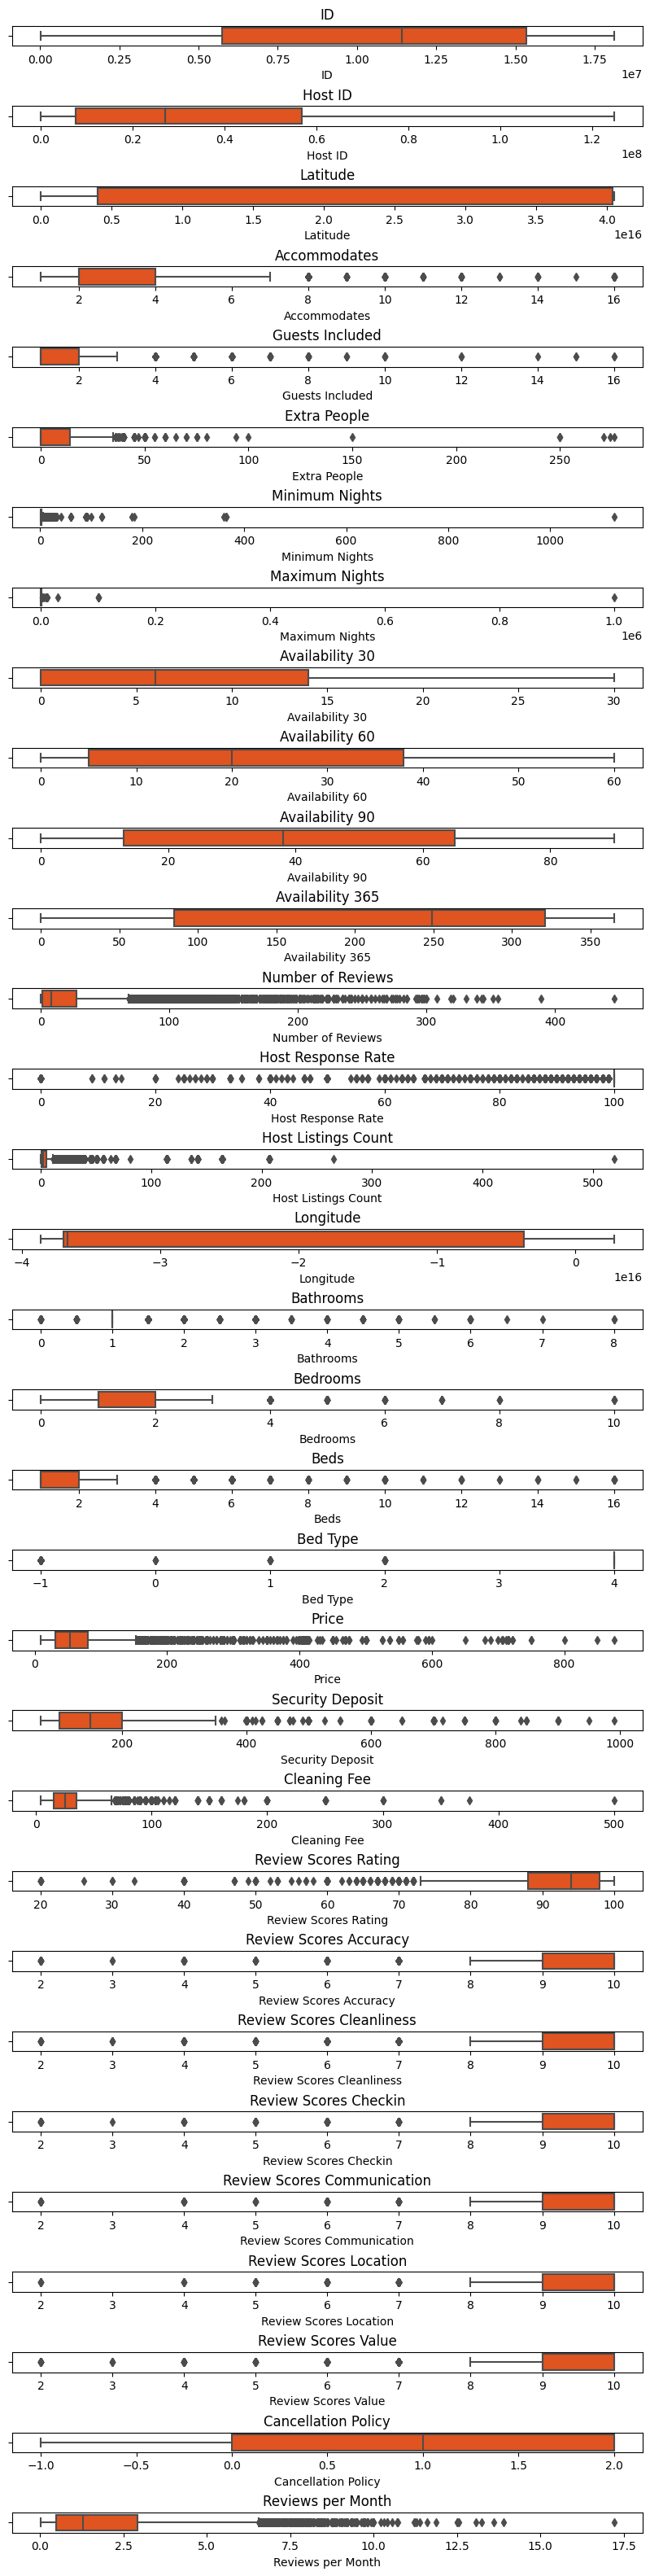

In [ ]:

fig, ax = plt.subplots(nrows=32, ncols =1, figsize=(10,40))
fig.subplots_adjust(hspace=3)
for i, col in enumerate(df_numerical_total):
    sns.boxplot(x=col, data=df_numerical_total, ax=ax[i], color='orangered')
    ax[i].set_title(col)

Text(0.5, 1.0, 'Distribución del precio en dataframe original')

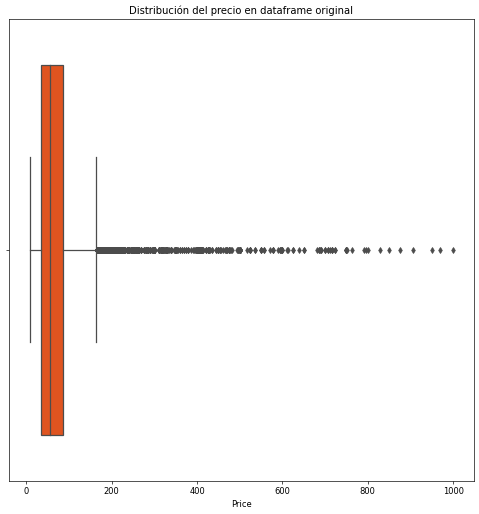

In [ ]:
plt.figure(figsize=(10,10), dpi=60)
sns.boxplot(x='Price', data=df, color='orangered')
plt.title ('Distribución del precio en dataframe original')

Text(0.5, 1.0, 'Distribución del precio en dataframe con valores nulos de reviews imputados')

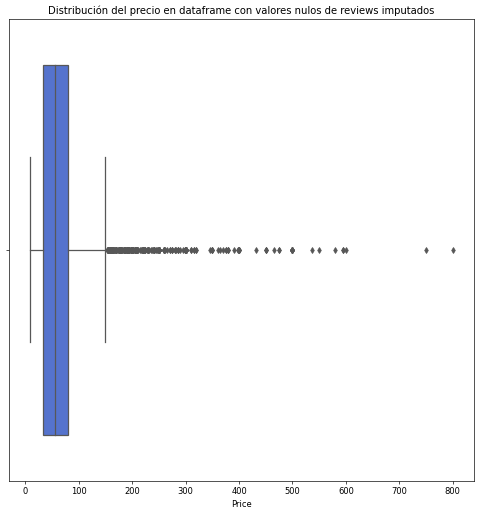

In [ ]:
plt.figure(figsize=(10,10), dpi=60)
sns.boxplot(x='Price', data=Madrid_airbnb_imputed_reviews_others, color='royalblue')
plt.title ("Distribución del precio en dataframe con valores nulos de reviews imputados")

Text(0.5, 1.0, 'Distribución del precio en dataframe con valores nulos de reviews eliminados')

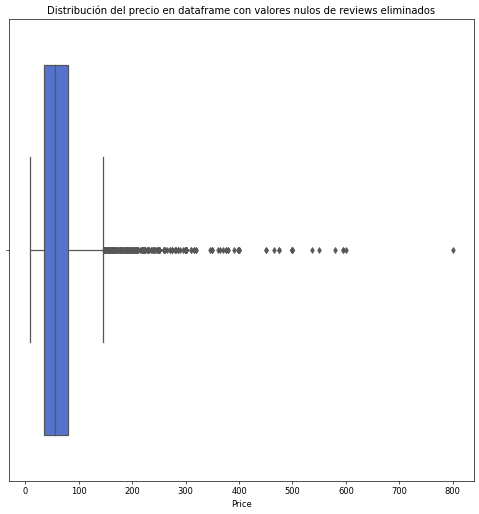

In [ ]:
plt.figure(figsize=(10,10), dpi=60)
sns.boxplot(x='Price', data=Madrid_airbnb_noreview, color='royalblue')
plt.title ("Distribución del precio en dataframe con valores nulos de reviews eliminados")

Text(0.5, 1.0, 'Distribución de la cantidad de reviews en dataframe original')

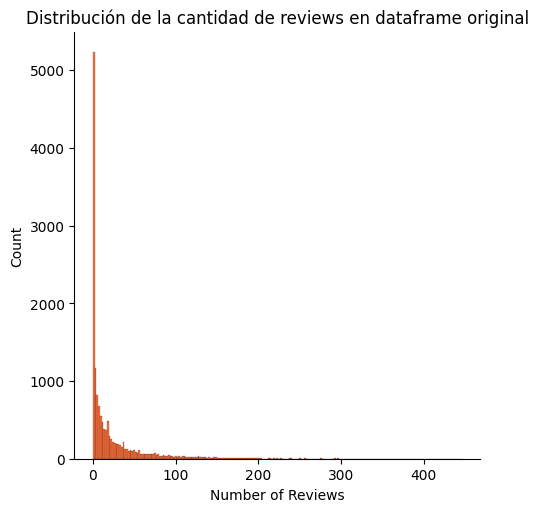

In [ ]:
sns.displot(df['Number of Reviews'], kde=False, color='orangered')
plt.title("Distribución de la cantidad de reviews en dataframe original")

Text(0.5, 1.0, 'Distribución del precio en dataframe con valores nulos de reviews imputados')

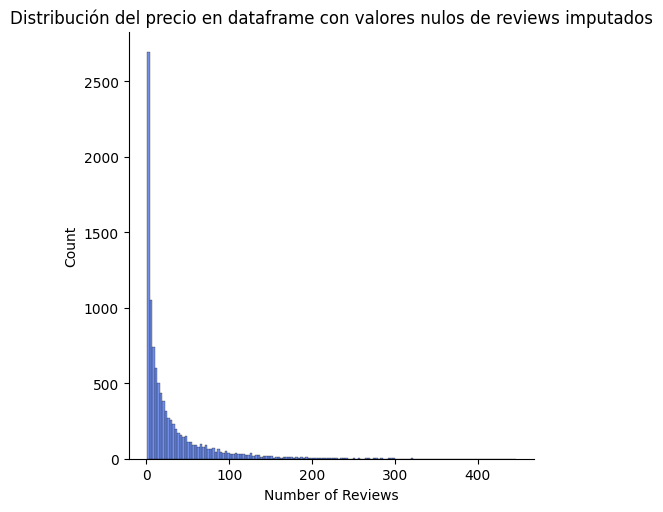

In [ ]:
sns.displot(Madrid_airbnb_imputed_reviews_others['Number of Reviews'], kde=False, color='royalblue')
plt.title("Distribución de la cantidad de reviews con valores nulos de reviews imputados")

Text(0.5, 1.0, 'Distribución del precio en dataframe con valores nulos de reviews elimiados')

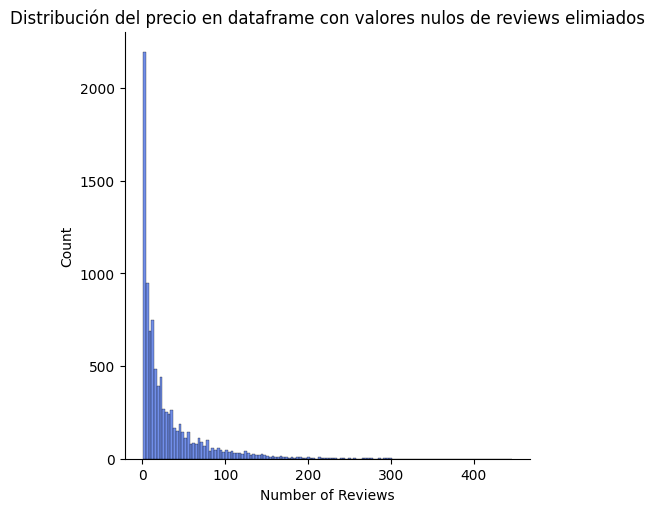

In [ ]:
sns.displot(Madrid_airbnb_noreview['Number of Reviews'], kde=False, color='royalblue')
plt.title("Distribución de la cantidad de reviews en dataframe con valores nulos de reviews elimiados")

Text(0.5, 1.0, 'Distribución de las reviews según precio en dataframe original')

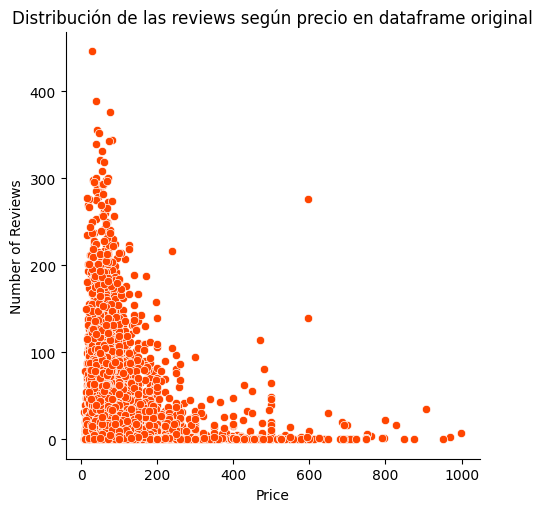

In [ ]:
sns.relplot(x='Price', y='Number of Reviews', data=df, color='orangered')
plt.title ("Distribución de las reviews según precio en dataframe original")

Text(0.5, 1.0, 'Distribución de las reviews según precio en dataframe con valores nulos de reviews imputados')

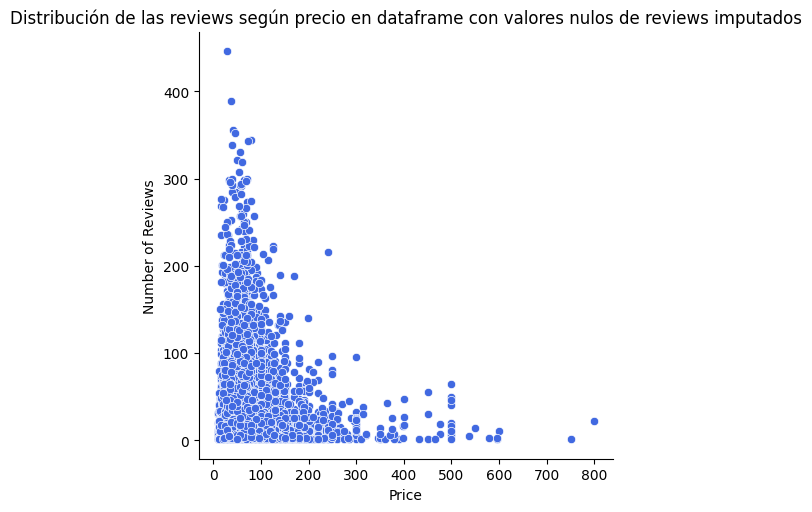

In [ ]:
sns.relplot(x='Price', y='Number of Reviews', data=Madrid_airbnb_imputed_reviews_others, color='royalblue')
plt.title ("Distribución de las reviews según precio en dataframe con valores nulos de reviews imputados")

Text(0.5, 1.0, 'Distribución de las reviews según precio en dataframe con valores nulos de reviews eliminados')

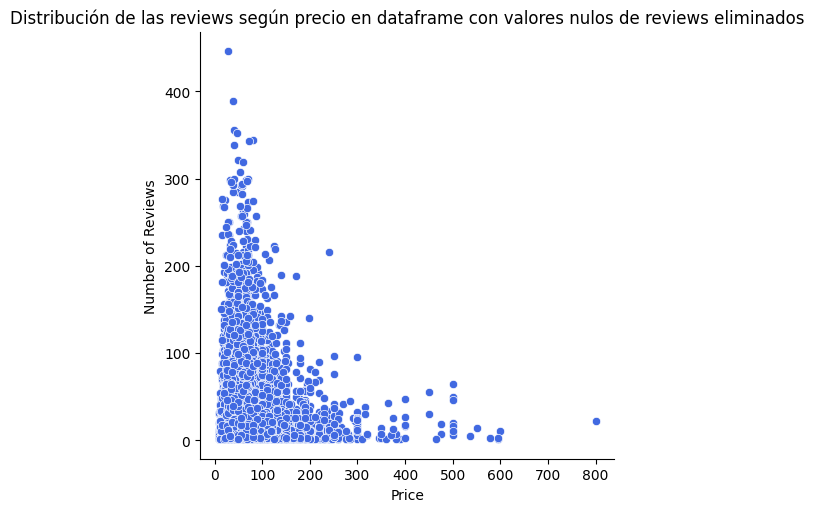

In [ ]:
sns.relplot(x='Price', y='Number of Reviews', data=Madrid_airbnb_noreview, color='royalblue')
plt.title ("Distribución de las reviews según precio en dataframe con valores nulos de reviews eliminados")

Text(0.5, 1.0, 'Distribución de las noches mínimas de estancia en dataframe original')

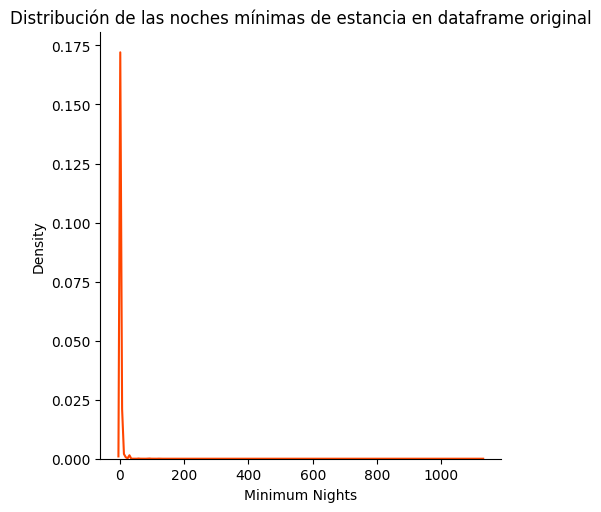

In [ ]:
sns.displot(data=df,x='Minimum Nights', kind ='kde',color='orangered')
plt.title("Distribución de las noches mínimas de estancia en dataframe original")

Tras análisis de las noches mínimas de estancia en dataframe original vemos que tenemos un dato extremo que nos indica un mínimo de noches superior a 1000. Es posible que un usuario defina este número de noches como mínimo para evitar que pueda haber una reserva por error en un periodo en el que no está activa la propiedad, sin embargo en este caso creemos que se trate de un error y procedemos a limitarlo a un mínimo de noches de 365.

In [ ]:
Madrid_airbnb_imputed_reviews_others['Minimum Nights'].unique()

array([   2,    1,    7,    4,    3,    5,   20,   30,   21,   15,   10,
          6,   14,   12,  365,   60,   28,   13,   90,  360,  185,   32,
          8,   29,   26,   25,   89,   99,    9,   19,  120, 1125,   91,
         17], dtype=int64)

In [ ]:
Madrid_airbnb_imputed_reviews_others.drop(Madrid_airbnb_imputed_reviews_others[Madrid_airbnb_imputed_reviews_others['Minimum Nights'] >= 365].index, inplace = True)

C:\Users\mtzmt\AppData\Local\Temp\ipykernel_10688\881603084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Madrid_airbnb_imputed_reviews_others.drop(Madrid_airbnb_imputed_reviews_others[Madrid_airbnb_imputed_reviews_others['Minimum Nights'] >= 365].index, inplace = True)


Text(0.5, 1.0, 'Distribución de las reviews según precio en dataframe con valores nulos de reviews imputados')

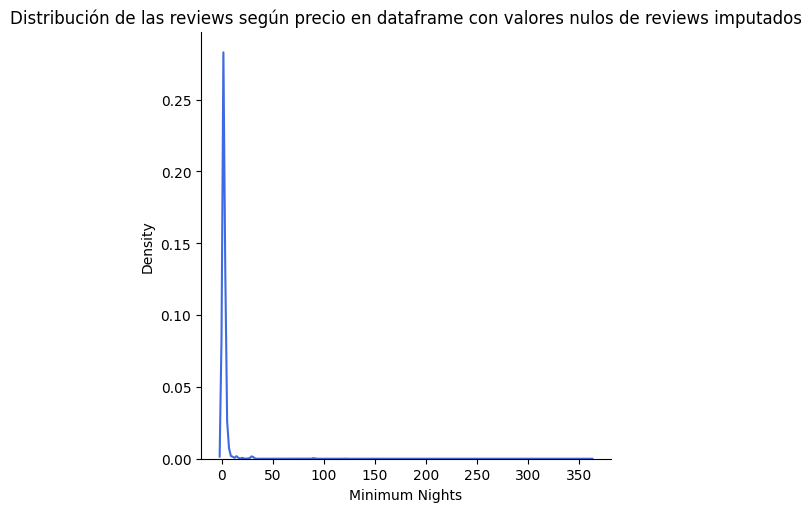

In [ ]:
sns.displot(data=Madrid_airbnb_imputed_reviews_others, x='Minimum Nights', kind ='kde',color='royalblue')
plt.title("Distribución de las reviews según precio en dataframe con valores nulos de reviews imputados")

Text(0.5, 1.0, 'Distribución de las reviews según precio en dataframe con valores nulos de reviews eliminados')

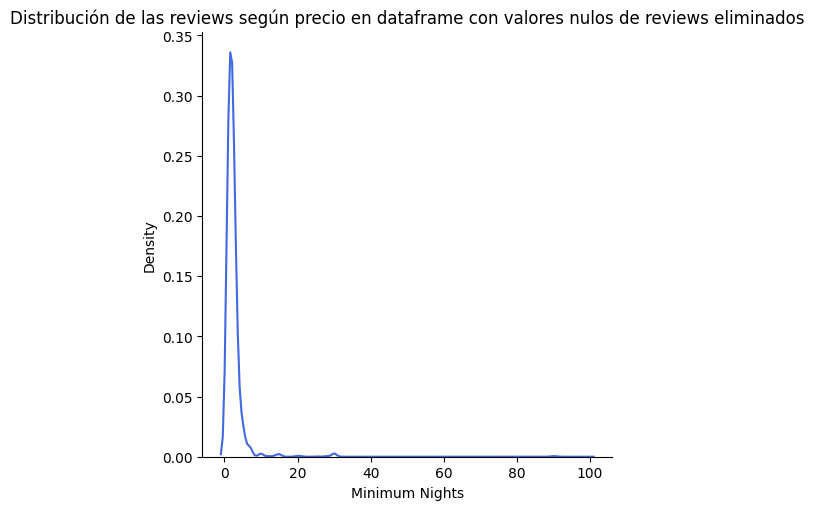

In [ ]:
sns.displot(data=Madrid_airbnb_noreview, x='Minimum Nights', kind ='kde',color='royalblue')
plt.title("Distribución de las reviews según precio en dataframe con valores nulos de reviews eliminados")


Text(0.5, 1.0, 'Distribución del precio según tipo de alojamiento en dataframe original')

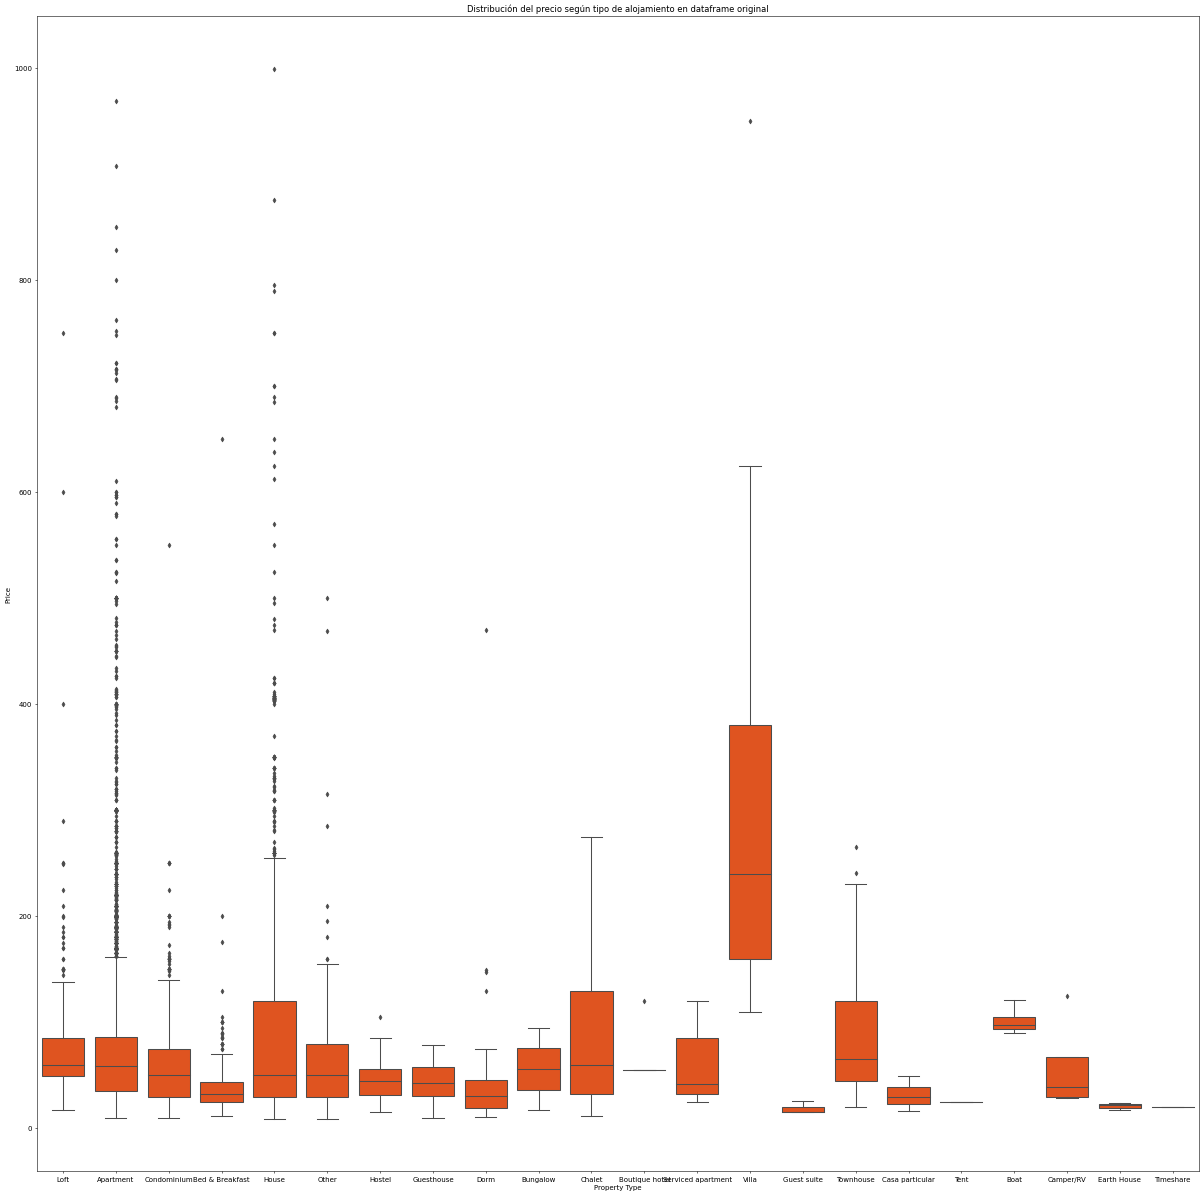

In [ ]:
plt.figure(figsize=(30,30), dpi=50)
sns.boxplot(x='Property Type', y='Price', data=df, color='orangered')
plt.title ("Distribución del precio según tipo de alojamiento en dataframe original")

Text(0.5, 1.0, 'Distribución del precio según tipo de alojamiento en dataframe con valores nulos de reviews imputados')

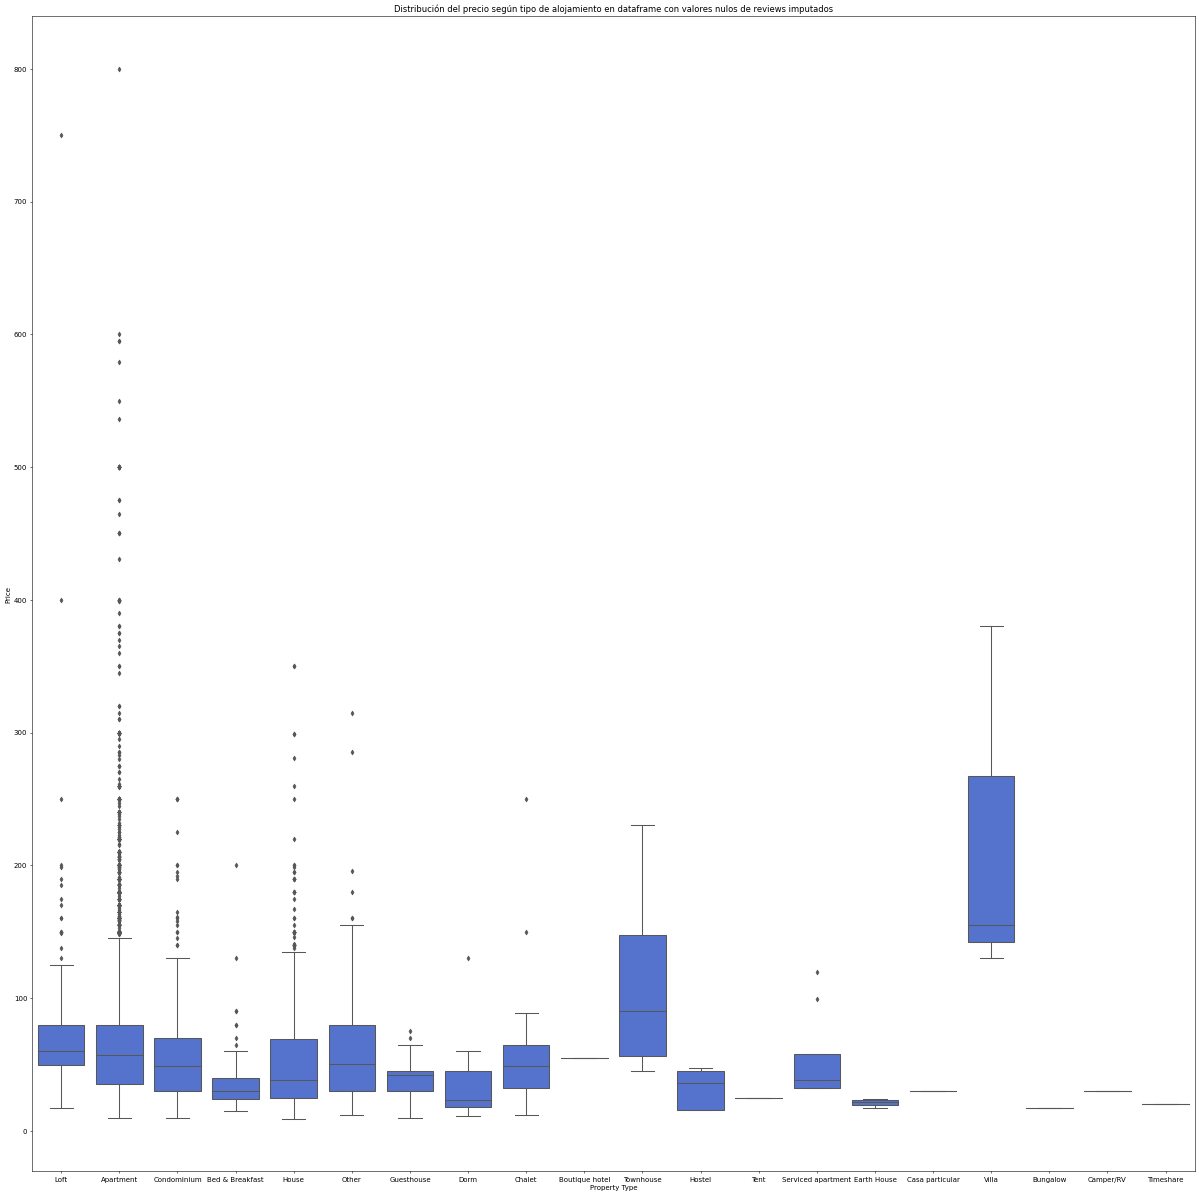

In [ ]:
plt.figure(figsize=(30,30), dpi=50)
sns.boxplot(x='Property Type', y='Price', data=Madrid_airbnb_imputed_reviews_others, color='royalblue')
plt.title ("Distribución del precio según tipo de alojamiento en dataframe con valores nulos de reviews imputados")

Text(0.5, 1.0, 'Distribución del precio según tipo de alojamiento en dataframe con valores nulos de reviews eliminados')

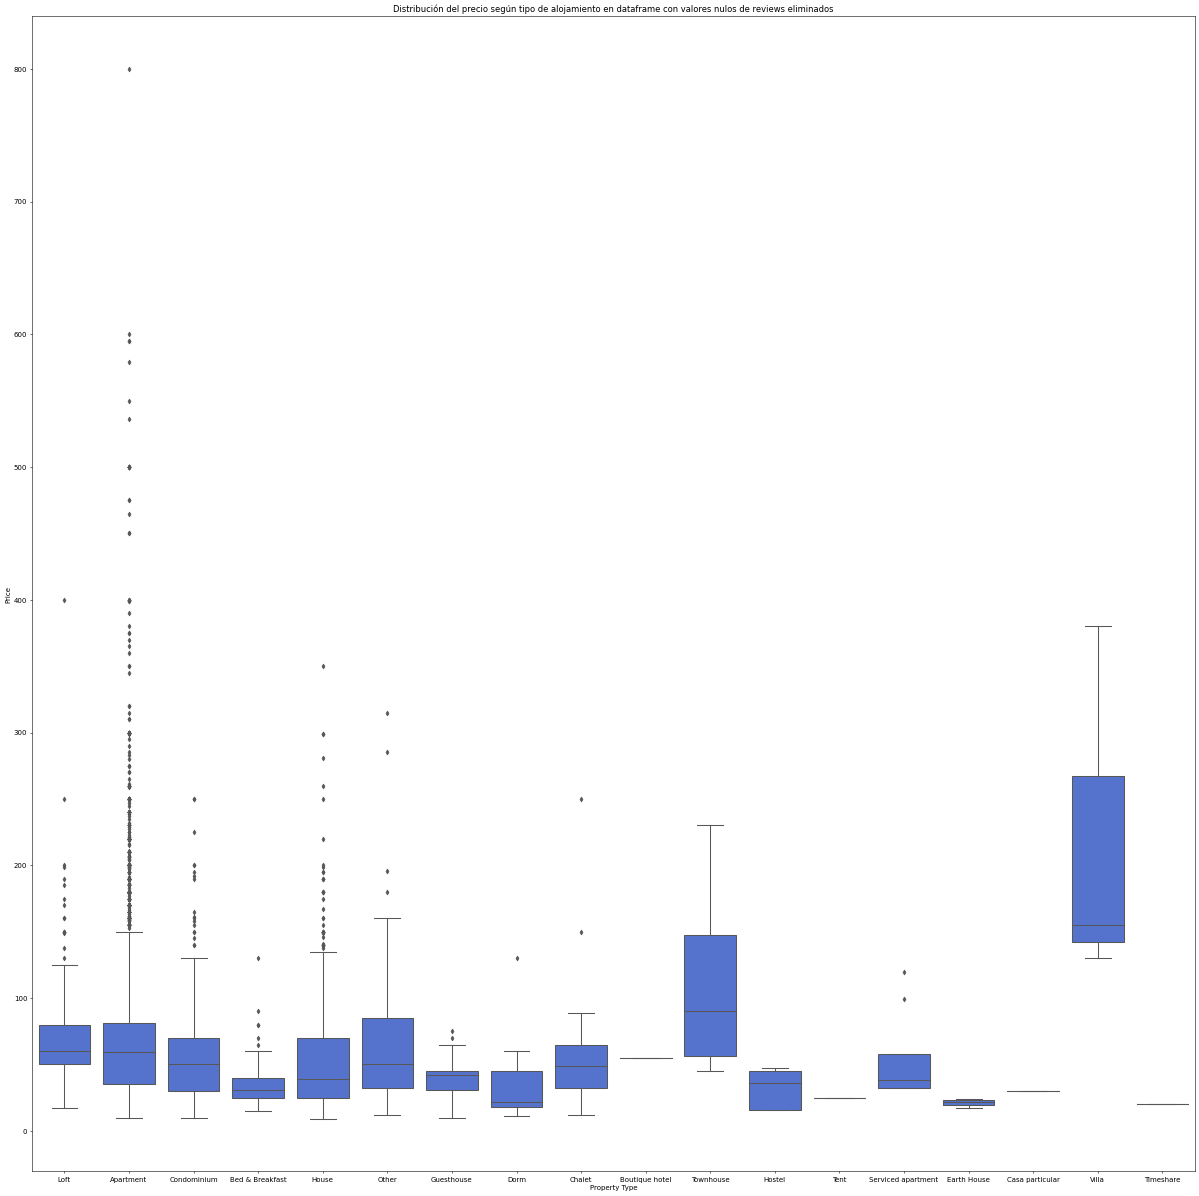

In [ ]:
plt.figure(figsize=(30,30), dpi=50)
sns.boxplot(x='Property Type', y='Price', data=Madrid_airbnb_noreview, color='royalblue')
plt.title ("Distribución del precio según tipo de alojamiento en dataframe con valores nulos de reviews eliminados")

C:\Users\mtzmt\AppData\Local\Temp\ipykernel_10688\4043080053.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(Madrid_airbnb_imputed_reviews_others.corr(), vmin=-1, vmax=1, annot=True, mask= np.triu(Madrid_airbnb_imputed_reviews_others.corr()),cmap='mako')


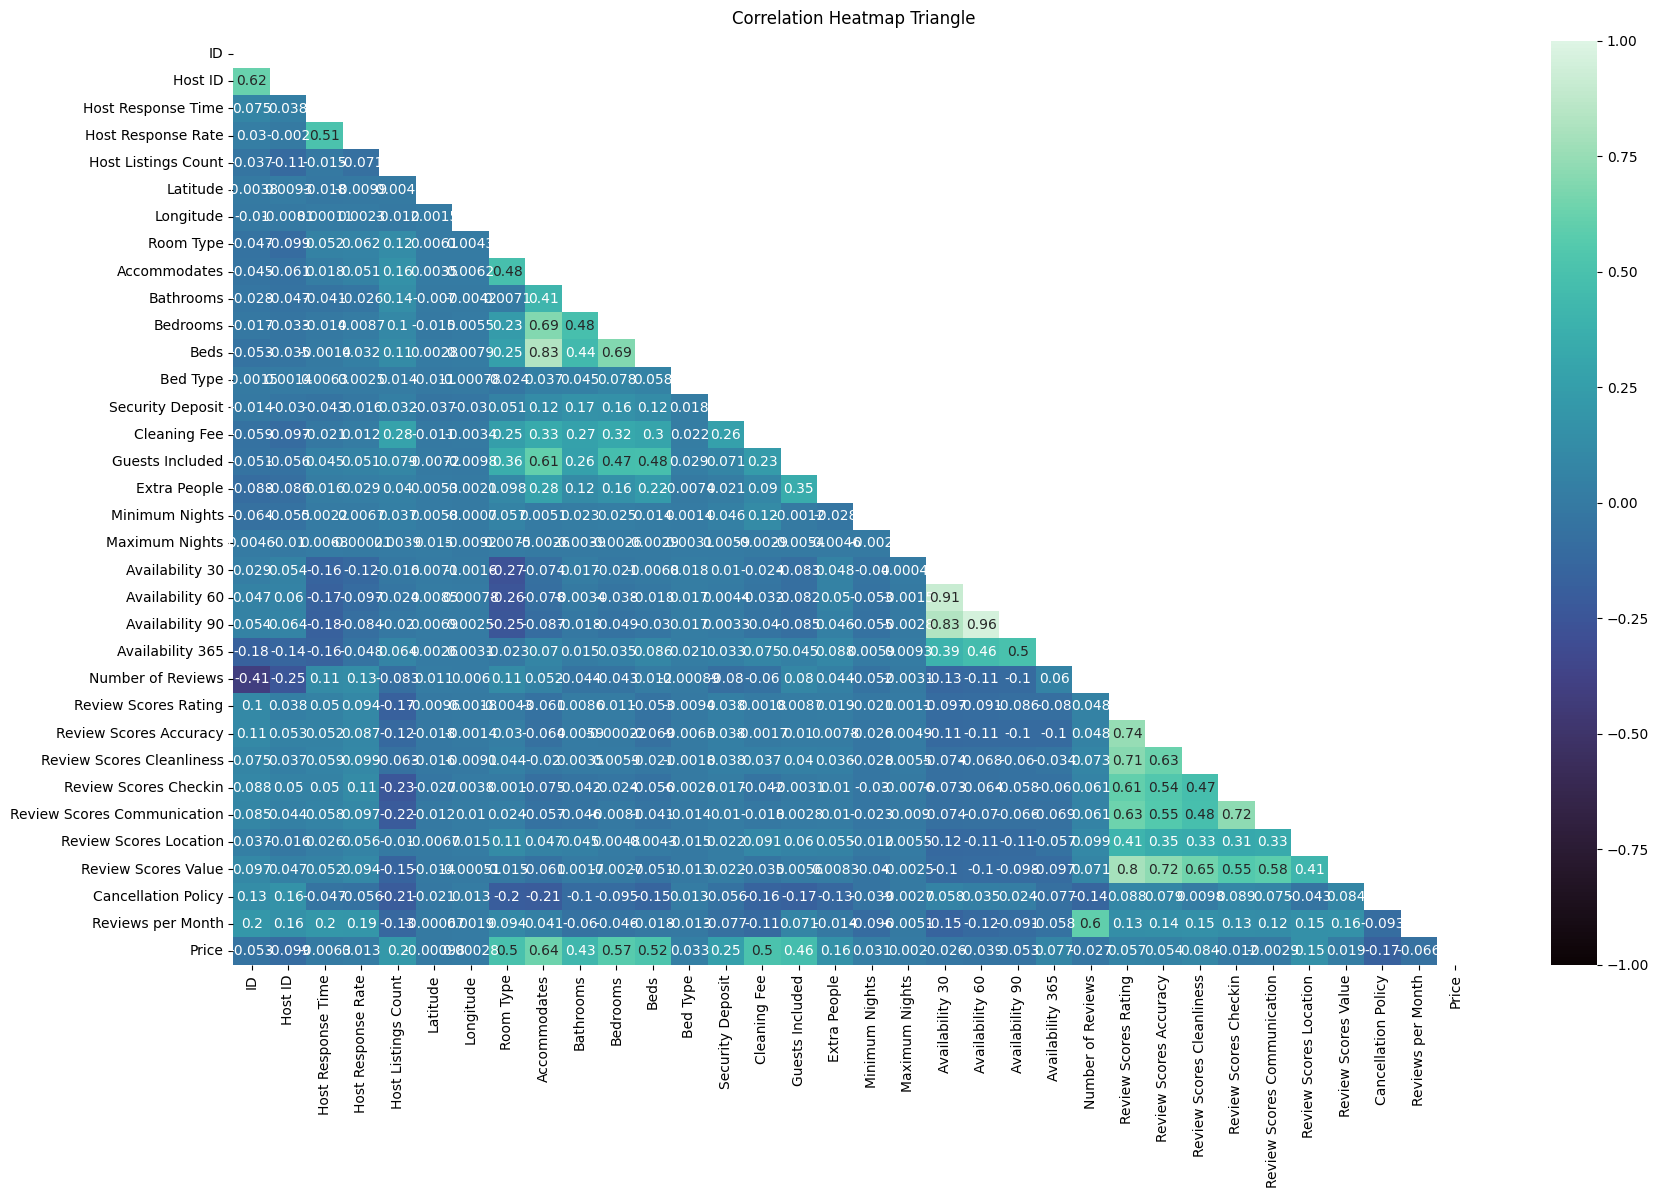

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 12))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(Madrid_airbnb_imputed_reviews_others.corr(), vmin=-1, vmax=1, annot=True, mask= np.triu(Madrid_airbnb_imputed_reviews_others.corr()),cmap='mako')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap Triangle', fontdict={'fontsize':12}, pad=12);


Tras visualización del mapa de calor vemos una alta correlación entre los valores Availability 60 & Availability 30 (0,91) y Availability 90 & Availability 60 (0,96).
Decidimos eliminar Availability 60 y  Availability 90, dejamos únicamente Availability 30 y Availability 365 que nos aportan los mismos datos.

In [ ]:
Madrid_airbnb_imputed_reviews_others = Madrid_airbnb_imputed_reviews_others.drop(columns = ['Availability 60', 'Availability 90'])
Madrid_airbnb_imputed_reviews_others

,ID,Descrip_processed,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood,Neighbourhood Group,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Price
0,15141125,charming bright and cosy studio rastro located...,96019257,2016-09-20,3,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,2,2,1.0,0.0,1.0,4.0,100.0,20.0,2,15,2,1125,13,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.11,50.0
1,9470166,the center recently remodeled comfortable mode...,9885245,2013-11-08,3,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,2,4,1.0,1.0,2.0,4.0,250.0,15.0,2,25,1,1125,15,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,0.0,5.88,50.0
2,17444981,nice apartment near sol and latina perfect for...,118059488,2017-02-25,3,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,2,4,1.5,1.0,2.0,4.0,240.0,25.0,1,0,1,1125,7,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,1.0,6.18,77.0
3,3284565,alquilo estudio centro madrid totalmente equip...,1892467,2012-03-09,2,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,2,2,1.0,1.0,2.0,4.0,200.0,25.0,1,20,7,1125,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,0.19,50.0
4,499911,bright and airy apartment central madrid recen...,2467212,2012-05-26,3,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,2,5,1.0,2.0,4.0,4.0,200.0,60.0,4,0,4,1125,3,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.39,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,one bedroom private bathroom full comfort calm...,132052,2010-05-25,2,90.0,1.0,Cortes,Centro,28014,Madrid,404113336999166,-3.694809e+15,Apartment,1,2,1.0,1.0,1.0,2.0,100.0,30.0,1,20,2,90,18,353,26,2014-04-29,2016-06-11,91.0,9.0,10.0,9.0,9.0,10.0,9.0,1.0,0.72,55.0
12826,684744,apartamento moderno luminoso localizado centro...,1722284,2012-02-08,3,100.0,2.0,Cortes,Centro,28014,Madrid,4041293036599800,-3.695167e+15,Apartment,2,4,1.0,1.0,3.0,4.0,144.0,25.0,2,9,3,1125,1,212,85,2012-10-29,2017-01-23,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.57,80.0
12827,14770511,lugares interés teatro real círculo bellas art...,92135434,2016-08-27,0,0.0,2.0,Cortes,Centro,28014,Madrid,4041464666535230,-3.697372e+14,Apartment,1,3,2.0,1.0,2.0,4.0,150.0,10.0,2,18,2,1125,29,364,1,2016-10-25,2016-10-25,80.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.18,50.0
12828,6605890,located minutes from the prado museum and minu...,28559508,2015-03-01,3,100.0,4.0,Cortes,Centro,28014,Madrid,4041412238545280,-3.697248e+15,Apartment,2,4,1.0,1.0,2.0,4.0,190.0,30.0,2,10,2,1125,3,112,122,2015-06-15,2017-04-02,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.51,70.0


In [ ]:
Madrid_airbnb_noreview = Madrid_airbnb_noreview.drop(columns = ['Availability 60', 'Availability 90'])
Madrid_airbnb_noreview

,ID,Descrip_processed,Host ID,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood,Neighbourhood Group,Zipcode,City,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Price
0,15141125,charming bright and cosy studio rastro located...,96019257,2016-09-20,3,100.0,2.0,Embajadores,Centro,28005,Madrid,4040745268477800,-3.707995e+16,Loft,2,2,1.0,0.0,1.0,4.0,100.0,20.0,2,15,2,1125,13,66,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.11,50.0
1,9470166,the center recently remodeled comfortable mode...,9885245,2013-11-08,3,100.0,13.0,Embajadores,Centro,28012,Madrid,4040831556101920,-3.705006e+15,Apartment,2,4,1.0,1.0,2.0,4.0,250.0,15.0,2,25,1,1125,15,347,97,2015-12-01,2017-04-04,81.0,8.0,8.0,9.0,9.0,9.0,8.0,0.0,5.88,50.0
2,17444981,nice apartment near sol and latina perfect for...,118059488,2017-02-25,3,100.0,1.0,Embajadores,Centro,28012,Madrid,40413722014584200,-3.706823e+16,Apartment,2,4,1.5,1.0,2.0,4.0,240.0,25.0,1,0,1,1125,7,155,7,2017-03-06,2017-04-07,89.0,9.0,10.0,9.0,10.0,10.0,10.0,1.0,6.18,77.0
3,3284565,alquilo estudio centro madrid totalmente equip...,1892467,2012-03-09,2,100.0,3.0,Embajadores,Centro,28012,Madrid,40411263372718000,-3.697305e+16,Apartment,2,2,1.0,1.0,2.0,4.0,200.0,25.0,1,20,7,1125,7,191,6,2014-08-18,2016-08-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.0,0.19,50.0
4,499911,bright and airy apartment central madrid recen...,2467212,2012-05-26,3,100.0,1.0,Embajadores,Centro,28012,Madrid,4041255625665070,-3.701155e+15,Apartment,2,5,1.0,2.0,4.0,4.0,200.0,60.0,4,0,4,1125,3,237,72,2013-01-04,2017-03-21,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.39,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2847041,one bedroom private bathroom full comfort calm...,132052,2010-05-25,2,90.0,1.0,Cortes,Centro,28014,Madrid,404113336999166,-3.694809e+15,Apartment,1,2,1.0,1.0,1.0,2.0,100.0,30.0,1,20,2,90,18,353,26,2014-04-29,2016-06-11,91.0,9.0,10.0,9.0,9.0,10.0,9.0,1.0,0.72,55.0
12826,684744,apartamento moderno luminoso localizado centro...,1722284,2012-02-08,3,100.0,2.0,Cortes,Centro,28014,Madrid,4041293036599800,-3.695167e+15,Apartment,2,4,1.0,1.0,3.0,4.0,144.0,25.0,2,9,3,1125,1,212,85,2012-10-29,2017-01-23,95.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,1.57,80.0
12827,14770511,lugares interés teatro real círculo bellas art...,92135434,2016-08-27,0,0.0,2.0,Cortes,Centro,28014,Madrid,4041464666535230,-3.697372e+14,Apartment,1,3,2.0,1.0,2.0,4.0,150.0,10.0,2,18,2,1125,29,364,1,2016-10-25,2016-10-25,80.0,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.18,50.0
12828,6605890,located minutes from the prado museum and minu...,28559508,2015-03-01,3,100.0,4.0,Cortes,Centro,28014,Madrid,4041412238545280,-3.697248e+15,Apartment,2,4,1.0,1.0,2.0,4.0,190.0,30.0,2,10,2,1125,3,112,122,2015-06-15,2017-04-02,94.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,5.51,70.0


WORDCLOUD en dataframe con valores nulos de reviews imputados

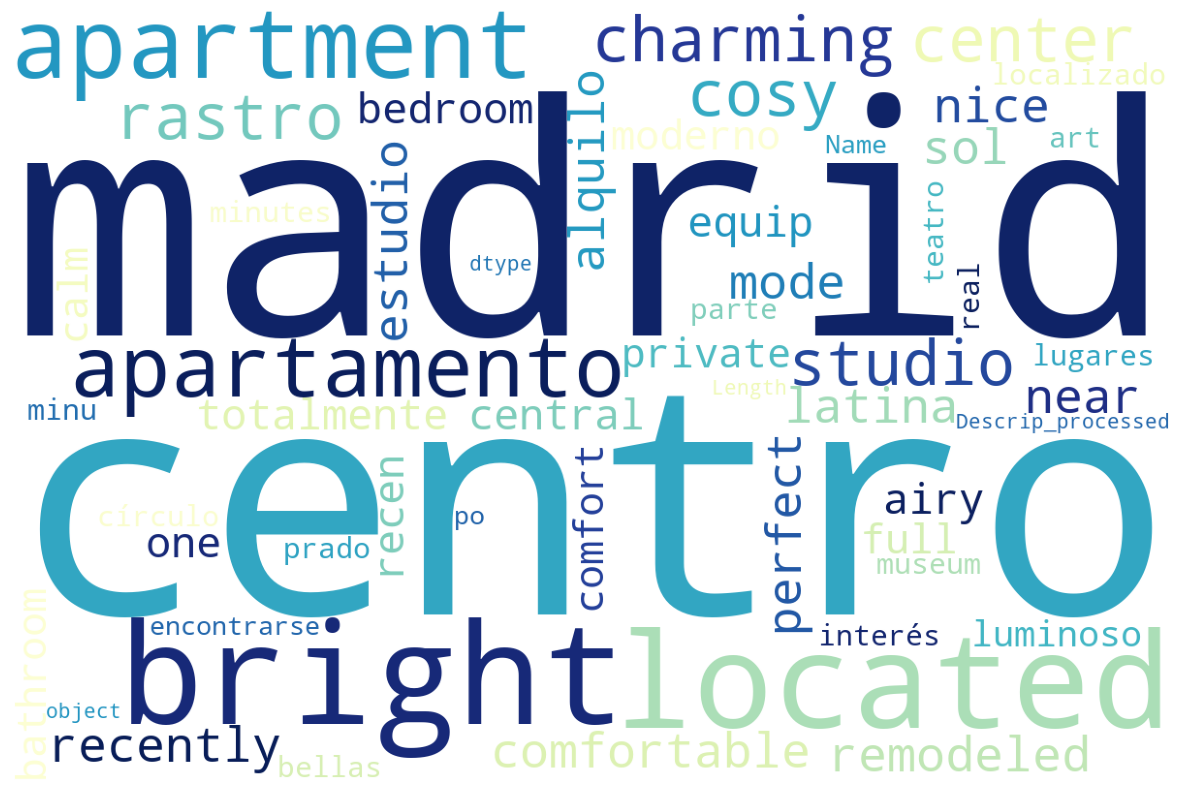

In [ ]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800, colormap='YlGnBu_r').generate(str(Madrid_airbnb_imputed_reviews_others['Descrip_processed']))

plt.rcParams['figure.figsize'] = (15, 15)

print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

WORDCLOUD en dataframe con valores nulos de reviews eliminados.

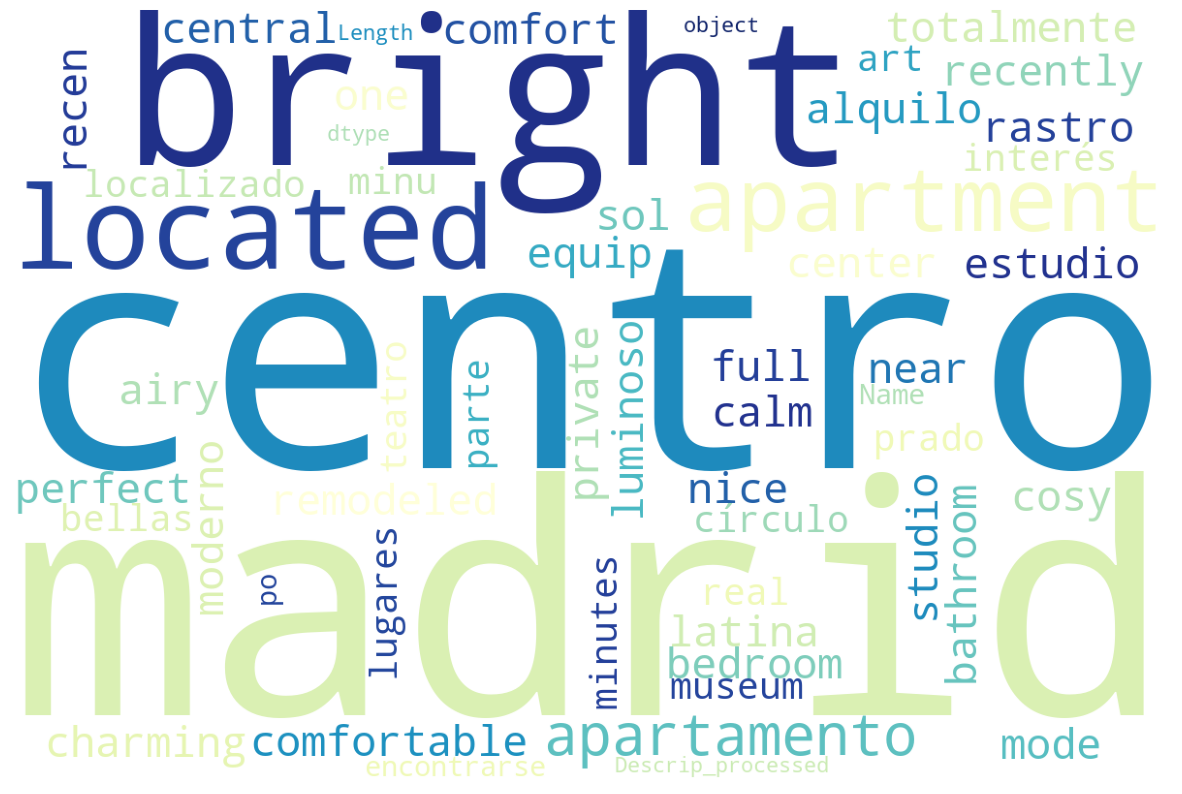

In [ ]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800, colormap='YlGnBu_r').generate(str(Madrid_airbnb_noreview['Descrip_processed']))

plt.rcParams['figure.figsize'] = (15, 15)

print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
Madrid_airbnb_imputed_reviews_others.to_csv((r'C:\Users\mtzmt\OneDrive\Documentos\Bootcamp\Proyecto_final_Bootcamp\Madrid_airbnb_imputed_reviews_others.csv'))

In [ ]:
Madrid_airbnb_noreview.to_csv(r'C:\Users\mtzmt\OneDrive\Documentos\Bootcamp\Proyecto_final_Bootcamp\Madrid_airbnb_noreview.csv')

### Next step: import csv into Postgres


**We will use the cleaned dataframe 'Madrid_airbnb_noreview' to load into Postgres as part of the project requirements.**


The two data frames will then be used to create and compare a linear regression model with R.